### **Penambangan Data** 2023D <br>


1.   Nani Fitria Ramadhani (23031554013
2.   Ardina Shaifa Ramadhany (23031554027)
3.   Gisella Serafina Lukman M. (23031554215)





# **Analisis Survival pada Pasien Kanker Payudara**

In [42]:
pip install lifelines


In [43]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from lifelines.statistics import proportional_hazard_test
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



## 1. Load Dataset

In [44]:
# Load data
data = pd.read_csv('NKI_cleaned.csv')
data.head()

Patient  ID  age  eventdeath   survival  timerecurrence  chemo  hormonal  \
0    s122  18   43           0  14.817248       14.817248      0         0   
1    s123  19   48           0  14.261465       14.261465      0         0   
2    s124  20   38           0   6.644764        6.644764      0         0   
3    s125  21   50           0   7.748118        7.748118      0         1   
4    s126  22   38           0   6.436687        6.318960      0         0   

   amputation  histtype  ...  Contig36312_RC  Contig38980_RC  NM_000853  \
0           1         1  ...        0.591103       -0.355018   0.373644   
1           0         1  ...       -0.199829       -0.001635  -0.062922   
2           0         1  ...        0.328736       -0.047571   0.084228   
3           0         1  ...        0.648861       -0.039088   0.182182   
4           1         1  ...       -0.287538       -0.286893   0.057082   

   NM_000854  NM_000860  Contig29014_RC  Contig46616_RC  NM_000888  NM_000898  \
0  -0.760690  -0.164025       -0.038726        0.237856  -0.087631  -0.369153   
1  -0.682204  -0.220934       -0.100088       -0.466537  -0.231547  -0.643019   
2  -0.695950  -0.402840       -0.099965        0.110155  -0.114298   0.258495   
3  -0.524640   0.037320       -0.167688       -0.016790  -0.285344  -0.251188   
4  -0.565021  -0.105632       -0.108148       -0.405853  -0.053601  -0.677072   

   AF067420  
0  0.153795  
1 -0.014098  
2 -0.198911  
3  0.862710  
4  0.134160  

[5 rows x 1570 columns]


## 2. Data Preprocessing


In [45]:
# Menentukan kolom yang ingin diambil
ekstrak_kolom = [
    'eventdeath',
    'timerecurrence',
    'age',
    'chemo',
    'hormonal',
    'amputation',
    'histtype',
    'diam',
    'posnodes',
    'grade',
    'angioinv',
    'lymphinfil'
]

data = data[ekstrak_kolom]

In [46]:
# Cek info data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   eventdeath      272 non-null    int64  
 1   timerecurrence  272 non-null    float64
 2   age             272 non-null    int64  
 3   chemo           272 non-null    int64  
 4   hormonal        272 non-null    int64  
 5   amputation      272 non-null    int64  
 6   histtype        272 non-null    int64  
 7   diam            272 non-null    int64  
 8   posnodes        272 non-null    int64  
 9   grade           272 non-null    int64  
 10  angioinv        272 non-null    int64  
 11  lymphinfil      272 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 25.6 KB
None


In [47]:
data.head()

eventdeath  timerecurrence  age  chemo  hormonal  amputation  histtype  \
0           0       14.817248   43      0         0           1         1   
1           0       14.261465   48      0         0           0         1   
2           0        6.644764   38      0         0           0         1   
3           0        7.748118   50      0         1           0         1   
4           0        6.318960   38      0         0           1         1   

   diam  posnodes  grade  angioinv  lymphinfil  
0    25         0      2         3           1  
1    20         0      3         3           1  
2    15         0      2         1           1  
3    15         1      2         3           1  
4    15         0      2         2           1

In [48]:
# Cek missing values
print(data.isnull().sum())

eventdeath        0
timerecurrence    0
age               0
chemo             0
hormonal          0
amputation        0
histtype          0
diam              0
posnodes          0
grade             0
angioinv          0
lymphinfil        0
dtype: int64



## 3. Statistik Deskriptif
Melihat ringkasan statistik variabel numerik untuk memahami distribusi datanya.


In [49]:
# Statistik deskriptif
data.describe()

eventdeath  timerecurrence         age       chemo    hormonal  \
count  272.000000      272.000000  272.000000  272.000000  272.000000   
mean     0.283088        7.250433   44.047794    0.393382    0.132353   
std      0.451329        4.177462    5.464538    0.489401    0.339499   
min      0.000000        0.271047   26.000000    0.000000    0.000000   
25%      0.000000        4.389460   40.750000    0.000000    0.000000   
50%      0.000000        6.950034   45.000000    0.000000    0.000000   
75%      1.000000        9.986311   49.000000    1.000000    0.000000   
max      1.000000       18.340862   53.000000    1.000000    1.000000   

       amputation    histtype        diam    posnodes       grade    angioinv  \
count  272.000000  272.000000  272.000000  272.000000  272.000000  272.000000   
mean     0.441176    1.110294   22.529412    1.341912    2.128676    1.647059   
std      0.497443    0.545668    8.703345    2.108848    0.797821    0.876334   
min      0.000000    1.000000    2.000000    0.000000    1.000000    1.000000   
25%      0.000000    1.000000   15.000000    0.000000    1.000000    1.000000   
50%      0.000000    1.000000   20.000000    0.000000    2.000000    1.000000   
75%      1.000000    1.000000   29.250000    2.000000    3.000000    3.000000   
max      1.000000    7.000000   50.000000   13.000000    3.000000    3.000000   

       lymphinfil  
count  272.000000  
mean     1.261029  
std      0.596629  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      3.000000


## 4. Exploratory Data Analysis (EDA)


### 4.1 Histogram Survival
Distribusi variabel berdasarkan status kematian (eventdeath).

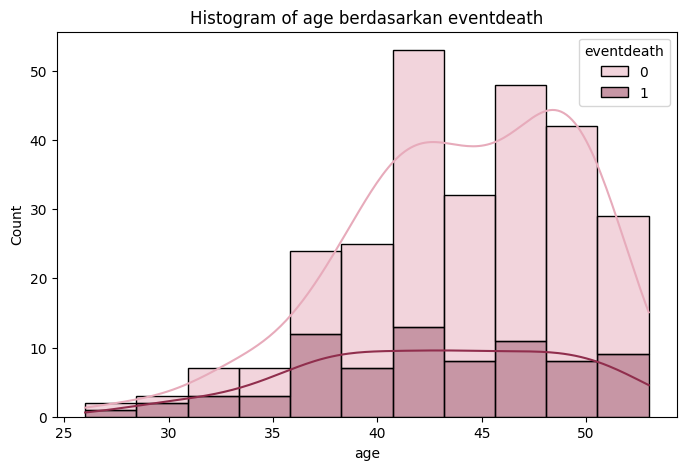

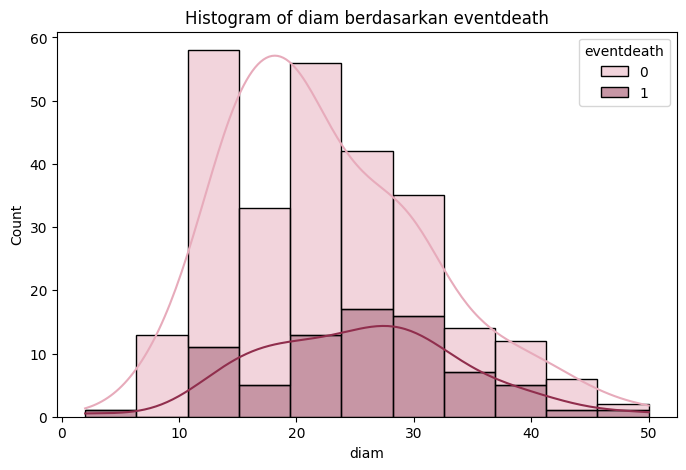

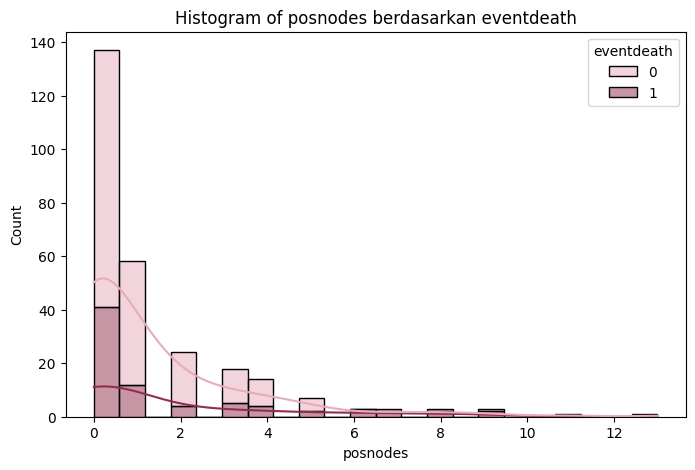

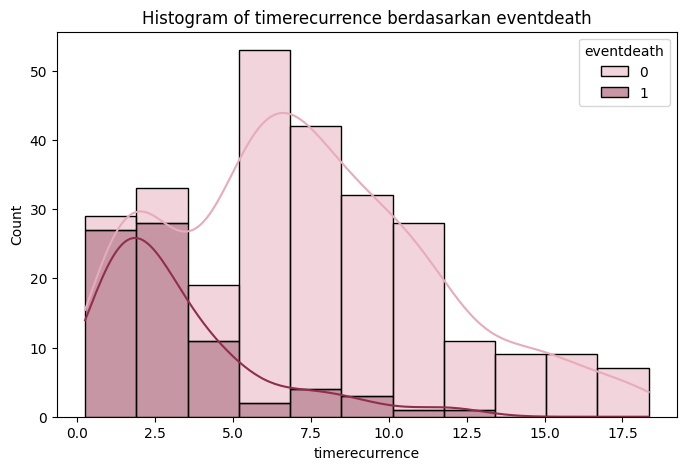

In [50]:
cols = ['age', 'diam', 'posnodes', 'timerecurrence']

for col in cols:
    plt.figure(figsize=(8,5))
    sns.histplot(data, x=col, hue='eventdeath', kde=True, multiple="stack", palette=["#e7abbb", "#902e4d"])
    plt.title(f'Histogram of {col} berdasarkan eventdeath')
    plt.show()



### 4.2 Heatmap Korelasi
Cek hubungan antar variabel numerik menggunakan korelasi Pearson.


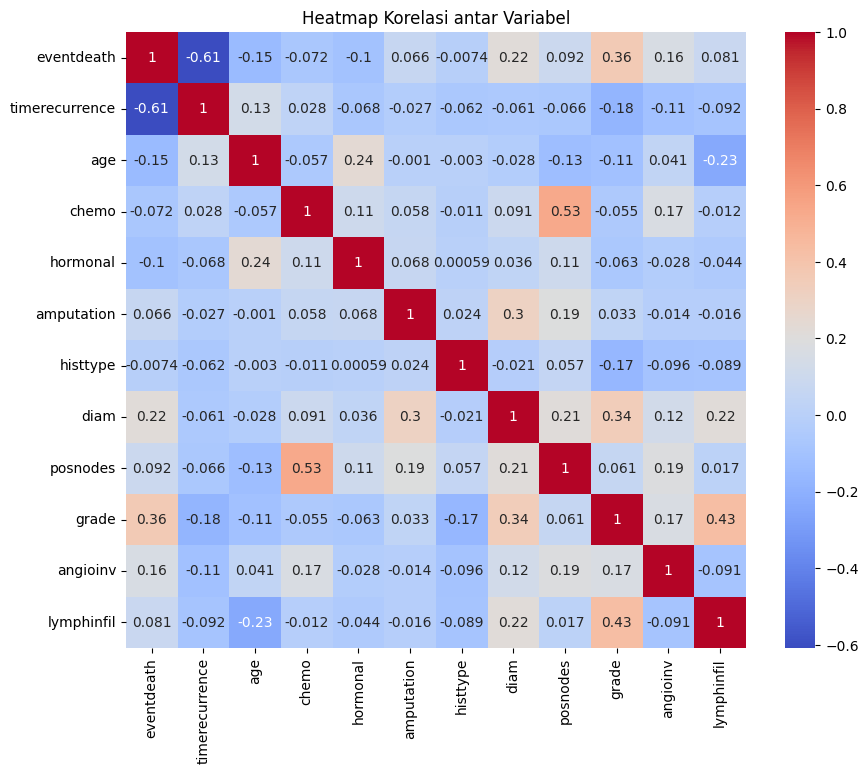

In [51]:
# Heatmap korelasi
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi antar Variabel')
plt.show()



### 4.3 Kaplan-Meier Survival Curve
Menganalisis survival berdasarkan jenis terapi: Chemotherapy, Hormonal, dan Amputation.


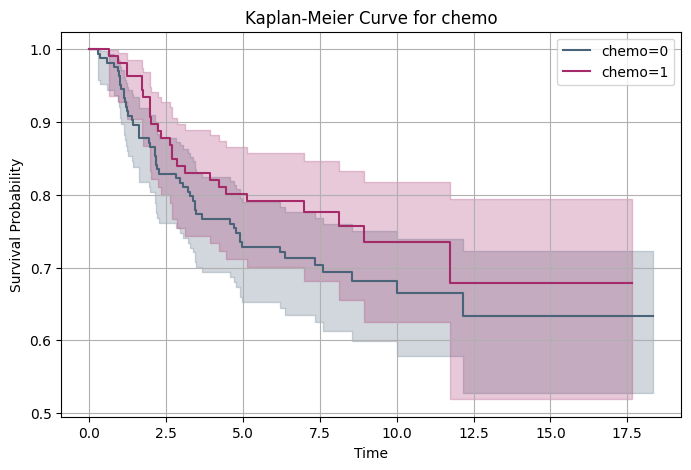

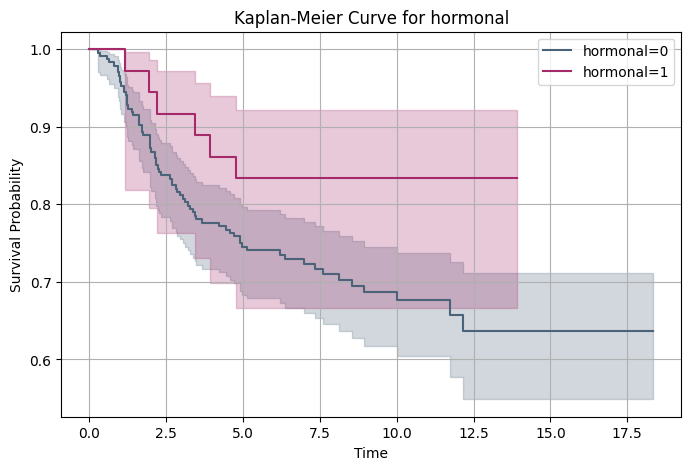

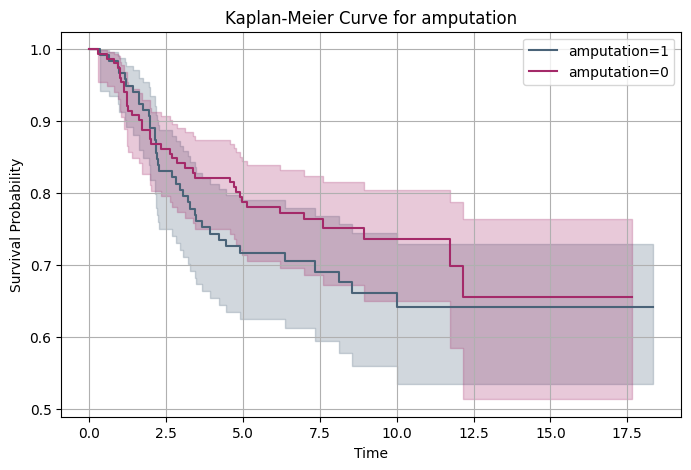

In [52]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

colors = ["#4a6378", "#a42a69"]

for var in ['chemo', 'hormonal', 'amputation']:
    plt.figure(figsize=(8,5))

    for i, group in enumerate(data[var].unique()):
        ix = data[var] == group
        kmf.fit(data.loc[ix, 'timerecurrence'], data.loc[ix, 'eventdeath'], label=f'{var}={group}')
        kmf.plot_survival_function(color=colors[i])

    plt.title(f'Kaplan-Meier Curve for {var}')
    plt.xlabel("Time")
    plt.ylabel("Survival Probability")
    plt.grid(True)
    plt.legend()
    plt.show()



## 5. Uji Asumsi Proportional Hazard


In [53]:
# Uji asumsi proportional hazard
cph_test = CoxPHFitter()
cph_test.fit(data, duration_col='timerecurrence', event_col='eventdeath')
results = proportional_hazard_test(cph_test, data, time_transform='rank')
results.summary


test_statistic         p  -log2(p)
age               3.082844  0.079122  3.659776
amputation        0.481154  0.487900  1.035343
angioinv          1.954417  0.162112  2.624940
chemo             0.116482  0.732881  0.448348
diam              0.112177  0.737679  0.438936
grade             4.283034  0.038495  4.699201
histtype          2.716194  0.099335  3.331560
hormonal          0.201651  0.653392  0.613980
lymphinfil        0.007880  0.929265  0.105838
posnodes          0.593137  0.441208  1.180468

Variabel yang melanggar asumsi adalah variabel dengan nilai p-value <0.05. Pada tabel diatas, variabel yang melanggar asumsi adalah variabel `grade`.


## 6. Modeling Cox


### 6.1 Stratified Cox Model
Karena variabel `grade` melanggar asumsi PH, maka dibuat stratifikasi berdasarkan `grade`.

In [54]:
# Stratified Cox Model
cph_stratified = CoxPHFitter()
cph_stratified.fit(data, duration_col='timerecurrence', event_col='eventdeath', strata=['grade'])
cph_stratified.print_summary()

<lifelines.CoxPHFitter: fitted with 272 total observations, 195 right-censored observations>
             duration col = 'timerecurrence'
                event col = 'eventdeath'
                   strata = grade
      baseline estimation = breslow
   number of observations = 272
number of events observed = 77
   partial log-likelihood = -317.11
         time fit was run = 2025-05-28 05:45:43 UTC

---
            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                   
age        -0.05      0.95      0.02           -0.10           -0.01                0.91                0.99
chemo      -0.55      0.58      0.31           -1.15            0.05                0.32                1.05
hormonal   -0.28      0.76      0.45           -1.16            0.61                0.31                1.83
amputation -0.01      0.99      0.25           -0.50            0.48                0.61                1.62
histtype    0.54      1.71      0.21            0.13            0.94                1.14                2.57
diam        0.02      1.02      0.01           -0.00            0.05                1.00                1.05
posnodes    0.08      1.08      0.06           -0.03            0.19                0.97                1.21
angioinv    0.21      1.24      0.14           -0.06            0.48                0.95                1.62
lymphinfil -0.29      0.75      0.20           -0.69            0.11                0.50                1.11

            cmp to     z    p  -log2(p)
covariate                              
age           0.00 -2.47 0.01      6.21
chemo         0.00 -1.81 0.07      3.82
hormonal      0.00 -0.61 0.54      0.89
amputation    0.00 -0.04 0.97      0.04
histtype      0.00  2.57 0.01      6.62
diam          0.00  1.62 0.11      3.24
posnodes      0.00  1.45 0.15      2.76
angioinv      0.00  1.55 0.12      3.06
lymphinfil    0.00 -1.43 0.15      2.71
---
Concordance = 0.66
Partial AIC = 652.22
log-likelihood ratio test = 22.70 on 9 df
-log2(p) of ll-ratio test = 7.18


### 6.2 Extended Cox Model
Extended Cox digunakan untuk memasukkan `grade` sebagai variabel yang bergantung waktu.


In [55]:
# Extended Cox Model
data['grade_timerecurrence'] = data['grade'] * data['timerecurrence']
cph_extended = CoxPHFitter()
cph_extended.fit(data, duration_col='timerecurrence', event_col='eventdeath')
cph_extended.print_summary()


<lifelines.CoxPHFitter: fitted with 272 total observations, 195 right-censored observations>
             duration col = 'timerecurrence'
                event col = 'eventdeath'
      baseline estimation = breslow
   number of observations = 272
number of events observed = 77
   partial log-likelihood = -215.51
         time fit was run = 2025-05-28 05:45:44 UTC

---
                      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                             
age                  -0.01      0.99      0.02           -0.05            0.04                0.95                1.04
chemo                -0.18      0.84      0.35           -0.87            0.51                0.42                1.67
hormonal             -0.53      0.59      0.47           -1.45            0.39                0.24                1.47
amputation           -0.03      0.98      0.26           -0.53            0.48                0.59                1.62
histtype              0.06      1.07      0.21           -0.35            0.48                0.71                1.61
diam                 -0.01      0.99      0.01           -0.04            0.02                0.96                1.02
posnodes              0.03      1.03      0.07           -0.10            0.16                0.90                1.17
grade                 4.68    107.42      0.49            3.72            5.63               41.39              278.80
angioinv              0.11      1.12      0.14           -0.16            0.39                0.85                1.47
lymphinfil           -0.36      0.70      0.20           -0.76            0.04                0.47                1.04
grade_timerecurrence -0.78      0.46      0.09           -0.95           -0.61                0.39                0.55

                      cmp to     z      p  -log2(p)
covariate                                          
age                     0.00 -0.38   0.70      0.51
chemo                   0.00 -0.50   0.61      0.70
hormonal                0.00 -1.14   0.26      1.96
amputation              0.00 -0.10   0.92      0.12
histtype                0.00  0.30   0.76      0.39
diam                    0.00 -0.60   0.55      0.86
posnodes                0.00  0.41   0.68      0.55
grade                   0.00  9.61 <0.005     70.24
angioinv                0.00  0.83   0.41      1.29
lymphinfil              0.00 -1.78   0.08      3.73
grade_timerecurrence    0.00 -8.85 <0.005     60.00
---
Concordance = 0.98
Partial AIC = 453.01
log-likelihood ratio test = 388.27 on 11 df
-log2(p) of ll-ratio test = 251.55


## 7. Perbandingan AIC
Model terbaik adalah yang memiliki nilai **AIC** paling kecil.


In [56]:
print(f"AIC Stratified Cox Model: {cph_stratified.AIC_partial_}")
print(f"AIC Extended Cox Model: {cph_extended.AIC_partial_}")

if cph_extended.AIC_partial_ < cph_stratified.AIC_partial_:
    print("=> Model Extended Cox lebih baik berdasarkan AIC.")
else:
    print("=> Model Stratified Cox lebih baik berdasarkan AIC.")


AIC Stratified Cox Model: 652.2163019929721
AIC Extended Cox Model: 453.01282299254507
=> Model Extended Cox lebih baik berdasarkan AIC.


# **Analisis Survival pada Pasien Kanker Payudara + data hasil PCA**


## 1. Load Dataset

In [57]:
# Load data
data = pd.read_csv('NKI_cleaned.csv')
data.head()

Patient  ID  age  eventdeath   survival  timerecurrence  chemo  hormonal  \
0    s122  18   43           0  14.817248       14.817248      0         0   
1    s123  19   48           0  14.261465       14.261465      0         0   
2    s124  20   38           0   6.644764        6.644764      0         0   
3    s125  21   50           0   7.748118        7.748118      0         1   
4    s126  22   38           0   6.436687        6.318960      0         0   

   amputation  histtype  ...  Contig36312_RC  Contig38980_RC  NM_000853  \
0           1         1  ...        0.591103       -0.355018   0.373644   
1           0         1  ...       -0.199829       -0.001635  -0.062922   
2           0         1  ...        0.328736       -0.047571   0.084228   
3           0         1  ...        0.648861       -0.039088   0.182182   
4           1         1  ...       -0.287538       -0.286893   0.057082   

   NM_000854  NM_000860  Contig29014_RC  Contig46616_RC  NM_000888  NM_000898  \
0  -0.760690  -0.164025       -0.038726        0.237856  -0.087631  -0.369153   
1  -0.682204  -0.220934       -0.100088       -0.466537  -0.231547  -0.643019   
2  -0.695950  -0.402840       -0.099965        0.110155  -0.114298   0.258495   
3  -0.524640   0.037320       -0.167688       -0.016790  -0.285344  -0.251188   
4  -0.565021  -0.105632       -0.108148       -0.405853  -0.053601  -0.677072   

   AF067420  
0  0.153795  
1 -0.014098  
2 -0.198911  
3  0.862710  
4  0.134160  

[5 rows x 1570 columns]


## 2. Data Preprocessing


In [58]:
data_pca = data.iloc[:, 16:]
data_pca

esr1  G3PDH_570  Contig45645_RC  Contig44916_RC    D25272    J00129  \
0   -0.413955  -0.954246        0.051024       -0.111203 -0.050066 -0.340897   
1    0.195251   0.244626       -0.199602       -0.111397 -0.135207  0.026813   
2    0.596177   0.082434       -0.156199       -0.084980 -0.179003 -0.490377   
3    0.501286  -1.071614       -0.206041       -0.051775 -0.049676 -0.306176   
4   -0.066771  -0.982276       -0.514666       -0.118483 -0.086523 -0.377659   
..        ...        ...             ...             ...       ...       ...   
267 -1.235442  -1.685581       -0.164630        0.154430  0.101913 -0.601388   
268  0.062265  -0.291542       -0.211872       -0.010131  0.012644 -0.510967   
269 -0.635322  -0.413171        0.839933        0.040242  0.117469 -0.445968   
270 -1.055801   0.068256        0.036255       -0.014642  0.135658 -0.569357   
271 -1.063121  -0.029350       -0.260638        0.039084  0.001326  1.206382   

     Contig29982_RC  Contig56678_RC  Contig53047_RC  Contig19551  ...  \
0         -0.038770       -0.104256       -0.485671    -0.565482  ...   
1         -0.165675        0.081549       -0.736914     0.118127  ...   
2         -0.193691        0.186532       -0.801328     0.128750  ...   
3          0.061596        0.115982       -0.842997    -0.020820  ...   
4         -0.093353        0.302795       -0.794573    -0.001558  ...   
..              ...             ...             ...          ...  ...   
267       -0.176571       -0.523702       -0.834471    -0.025337  ...   
268       -0.207124        0.484805       -0.665009     0.163677  ...   
269        1.312026       -0.057602       -0.607955     0.275818  ...   
270       -0.146483       -0.663936        1.003547     0.085405  ...   
271       -0.352870       -0.633569       -1.136520     0.165666  ...   

     Contig36312_RC  Contig38980_RC  NM_000853  NM_000854  NM_000860  \
0          0.591103       -0.355018   0.373644  -0.760690  -0.164025   
1         -0.199829       -0.001635  -0.062922  -0.682204  -0.220934   
2          0.328736       -0.047571   0.084228  -0.695950  -0.402840   
3          0.648861       -0.039088   0.182182  -0.524640   0.037320   
4         -0.287538       -0.286893   0.057082  -0.565021  -0.105632   
..              ...             ...        ...        ...        ...   
267       -0.695745       -0.076025   0.201054  -0.108361   0.222534   
268       -0.743322        0.108220   0.083472  -0.859677  -0.551512   
269       -0.778710        0.251779  -0.063160   0.450576   0.452686   
270       -0.614775       -0.417394  -0.077948  -0.126006  -0.841332   
271       -0.234388        0.181319  -0.030782  -1.035581  -0.521642   

     Contig29014_RC  Contig46616_RC  NM_000888  NM_000898  AF067420  
0         -0.038726        0.237856  -0.087631  -0.369153  0.153795  
1         -0.100088       -0.466537  -0.231547  -0.643019 -0.014098  
2         -0.099965        0.110155  -0.114298   0.258495 -0.198911  
3         -0.167688       -0.016790  -0.285344  -0.251188  0.862710  
4         -0.108148       -0.405853  -0.053601  -0.677072  0.134160  
..              ...             ...        ...        ...       ...  
267       -0.471391        0.026301   0.476758  -0.468408 -0.843889  
268       -0.191424       -0.844488  -0.357929  -0.585760  0.169989  
269        1.055764        0.591880  -0.510884   0.251903 -0.822792  
270       -0.274742       -0.063019  -0.396531   0.356816  0.345088  
271       -0.301661       -0.060805   0.794952  -1.089303 -0.326193  

[272 rows x 1554 columns]

In [59]:
# Cek info data
print(data_pca.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Columns: 1554 entries, esr1 to AF067420
dtypes: float64(1554)
memory usage: 3.2 MB
None


In [60]:
# Cek missing values
print(data_pca.isnull().sum())

esr1              0
G3PDH_570         0
Contig45645_RC    0
Contig44916_RC    0
D25272            0
                 ..
Contig29014_RC    0
Contig46616_RC    0
NM_000888         0
NM_000898         0
AF067420          0
Length: 1554, dtype: int64


### PCA

In [61]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

In [62]:
pca_full = PCA()
data_pca_full = pca_full.fit_transform(data_scaled)

Text(0, 0.5, 'Explained Variance Ratio')

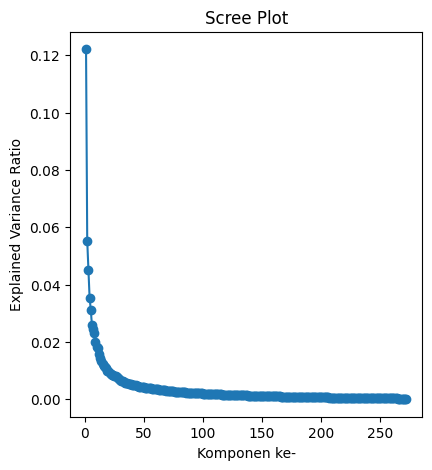

In [63]:
# Plot 1: Explained Variance Ratio Plot
explained_var = pca_full.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title("Scree Plot")
plt.xlabel("Komponen ke-")
plt.ylabel("Explained Variance Ratio")

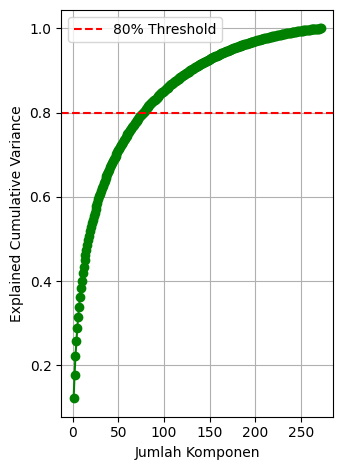

In [64]:
# Plot 2: Cumulative Explained Variance Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', color='green', linestyle='-')

plt.xlabel("Jumlah Komponen")
plt.ylabel("Explained Cumulative Variance")
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [65]:
# kumulatif varians
threshold = 0.8
n_components = np.argmax(cumulative_var >= threshold) + 1
print(f"Jumlah komponen untuk menjelaskan ≥{threshold*100}% variansi: {n_components}")

Jumlah komponen untuk menjelaskan ≥80.0% variansi: 78


In [66]:
# eigen
eigenvalues = pca_full.explained_variance_
n_components_eigen = np.sum(eigenvalues > 1)
print(f"Jumlah komponen dengan eigenvalue > 1: {n_components_eigen}")

Jumlah komponen dengan eigenvalue > 1: 200


In [67]:
# melakukan pca 77 komponen
pca = PCA(n_components=77)
X_pca = pca.fit_transform(data_scaled)

In [68]:
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, 78)])
df_pca

PC1        PC2        PC3        PC4        PC5        PC6  \
0    12.364424   4.064729   0.821001  -1.035341   0.067891   4.544613   
1    11.025288   3.795677  -1.737388   1.322819   2.156423  -5.912864   
2    13.135728   3.058892  -0.030498   0.483952  -5.336799  -4.131864   
3    14.455227  -2.617116  -1.153031  -8.622674   0.448923   3.749872   
4     6.153006 -10.228358  -0.097263  -0.745457   4.467328  -6.573338   
..         ...        ...        ...        ...        ...        ...   
267 -22.356937   3.241874 -11.104669  -3.691019 -12.123376   1.334649   
268   5.243416   1.479072   0.147383  -7.363439  11.116166 -15.847463   
269  -8.786732  18.503650  -0.197956 -19.368664  -2.649430  -0.798018   
270 -25.529232  17.817873   3.106660  -8.705558   0.873019  -3.897369   
271 -11.417361  10.189542   3.971723  14.470265   2.255693   7.482356   

           PC7        PC8        PC9       PC10  ...      PC68      PC69  \
0     1.567365  -1.610540  -1.758851  -2.770274  ... -1.103450 -2.604905   
1     4.186267   3.576707   6.426344  -3.159345  ... -2.089222 -0.153630   
2     2.341480  -2.076498   4.177044   2.419236  ...  1.029859 -1.486474   
3    13.918650  -0.482187   8.999572  -1.818409  ... -0.632251 -1.281002   
4     5.757984   2.411381  -1.141035   4.305276  ... -2.345098 -0.546155   
..         ...        ...        ...        ...  ...       ...       ...   
267  -3.242825   2.081391  -2.654450  -3.722726  ...  5.664418  2.343773   
268  -1.529311  12.333312  -5.712585   0.362694  ...  1.980075  1.890748   
269   5.928072   0.933040 -10.413611 -10.418197  ...  0.065676  3.162827   
270  -3.229989  -5.833527  -5.497516  -2.986997  ...  1.182191 -1.331845   
271  -0.166670   7.162423   1.603192  -0.443345  ... -0.449420 -0.167142   

         PC70      PC71      PC72      PC73      PC74      PC75      PC76  \
0   -4.215543  1.495968 -4.491057 -0.635547  3.326932  0.305451 -1.520939   
1    0.309038  3.912833 -0.093080 -1.591663 -0.192518  0.821106 -0.347002   
2    1.282951  0.552188 -2.573901  2.152965  0.652582 -1.105700  0.325982   
3    0.939012  1.344782 -1.606928  3.005441  0.572484 -0.622492 -1.219540   
4    2.273454 -1.126136 -0.545409 -0.824069  0.659043 -0.161267 -0.439499   
..        ...       ...       ...       ...       ...       ...       ...   
267  3.352639 -0.026739  0.423774 -2.338918  9.413565  1.602128  2.559868   
268 -2.182535 -0.012141 -4.916824 -2.174466 -2.830281  0.535394  1.979585   
269 -0.528393  0.503635 -4.269562  1.436250 -0.376700  1.926472 -0.516071   
270  4.154567  0.459579 -0.542916 -0.271460  0.409965  1.277730 -1.182443   
271 -4.176375  0.246742 -6.366298 -1.158759  1.351290 -6.955297 -2.172371   

         PC77  
0    3.123317  
1    0.122304  
2    1.747211  
3   -1.425725  
4   -0.855059  
..        ...  
267  1.690488  
268 -5.762577  
269 -1.485953  
270  1.917960  
271  0.641974  

[272 rows x 77 columns]

### Menggabungkan 12 variabel utama + pca

In [69]:
# Ini 12 data penting yg dipakai
ekstrak_kolom = [
    'eventdeath',
    'timerecurrence',
    'age',
    'chemo',
    'hormonal',
    'amputation',
    'histtype',
    'diam',
    'posnodes',
    'grade',
    'angioinv',
    'lymphinfil'
]

data = data[ekstrak_kolom]

In [70]:
# ini digabungin hasil pca sama data
data_pca = pd.concat([data.reset_index(drop=True), df_pca], axis=1)
data_pca

eventdeath  timerecurrence  age  chemo  hormonal  amputation  histtype  \
0             0       14.817248   43      0         0           1         1   
1             0       14.261465   48      0         0           0         1   
2             0        6.644764   38      0         0           0         1   
3             0        7.748118   50      0         1           0         1   
4             0        6.318960   38      0         0           1         1   
..          ...             ...  ...    ...       ...         ...       ...   
267           1        1.982204   48      1         0           1         1   
268           1        3.028063   39      0         0           1         1   
269           1        2.149213   50      0         0           1         1   
270           1        2.209446   52      0         1           1         1   
271           1        2.127310   52      0         0           1         1   

     diam  posnodes  grade  ...      PC68      PC69      PC70      PC71  \
0      25         0      2  ... -1.103450 -2.604905 -4.215543  1.495968   
1      20         0      3  ... -2.089222 -0.153630  0.309038  3.912833   
2      15         0      2  ...  1.029859 -1.486474  1.282951  0.552188   
3      15         1      2  ... -0.632251 -1.281002  0.939012  1.344782   
4      15         0      2  ... -2.345098 -0.546155  2.273454 -1.126136   
..    ...       ...    ...  ...       ...       ...       ...       ...   
267    30         0      3  ...  5.664418  2.343773  3.352639 -0.026739   
268    30         0      2  ...  1.980075  1.890748 -2.182535 -0.012141   
269    27         0      3  ...  0.065676  3.162827 -0.528393  0.503635   
270    28         0      3  ...  1.182191 -1.331845  4.154567  0.459579   
271    30         0      2  ... -0.449420 -0.167142 -4.176375  0.246742   

         PC72      PC73      PC74      PC75      PC76      PC77  
0   -4.491057 -0.635547  3.326932  0.305451 -1.520939  3.123317  
1   -0.093080 -1.591663 -0.192518  0.821106 -0.347002  0.122304  
2   -2.573901  2.152965  0.652582 -1.105700  0.325982  1.747211  
3   -1.606928  3.005441  0.572484 -0.622492 -1.219540 -1.425725  
4   -0.545409 -0.824069  0.659043 -0.161267 -0.439499 -0.855059  
..        ...       ...       ...       ...       ...       ...  
267  0.423774 -2.338918  9.413565  1.602128  2.559868  1.690488  
268 -4.916824 -2.174466 -2.830281  0.535394  1.979585 -5.762577  
269 -4.269562  1.436250 -0.376700  1.926472 -0.516071 -1.485953  
270 -0.542916 -0.271460  0.409965  1.277730 -1.182443  1.917960  
271 -6.366298 -1.158759  1.351290 -6.955297 -2.172371  0.641974  

[272 rows x 89 columns]


## 3. Statistik Deskriptif
Melihat ringkasan statistik variabel numerik untuk memahami distribusi datanya.


In [71]:
data_pca.describe()

eventdeath  timerecurrence         age       chemo    hormonal  \
count  272.000000      272.000000  272.000000  272.000000  272.000000   
mean     0.283088        7.250433   44.047794    0.393382    0.132353   
std      0.451329        4.177462    5.464538    0.489401    0.339499   
min      0.000000        0.271047   26.000000    0.000000    0.000000   
25%      0.000000        4.389460   40.750000    0.000000    0.000000   
50%      0.000000        6.950034   45.000000    0.000000    0.000000   
75%      1.000000        9.986311   49.000000    1.000000    0.000000   
max      1.000000       18.340862   53.000000    1.000000    1.000000   

       amputation    histtype        diam    posnodes       grade  ...  \
count  272.000000  272.000000  272.000000  272.000000  272.000000  ...   
mean     0.441176    1.110294   22.529412    1.341912    2.128676  ...   
std      0.497443    0.545668    8.703345    2.108848    0.797821  ...   
min      0.000000    1.000000    2.000000    0.000000    1.000000  ...   
25%      0.000000    1.000000   15.000000    0.000000    1.000000  ...   
50%      0.000000    1.000000   20.000000    0.000000    2.000000  ...   
75%      1.000000    1.000000   29.250000    2.000000    3.000000  ...   
max      1.000000    7.000000   50.000000   13.000000    3.000000  ...   

               PC68          PC69          PC70        PC71          PC72  \
count  2.720000e+02  2.720000e+02  2.720000e+02  272.000000  2.720000e+02   
mean  -9.143013e-17 -1.240837e-16 -3.918434e-17    0.000000  2.612289e-17   
std    2.164017e+00  2.144848e+00  2.119746e+00    2.101030  2.091677e+00   
min   -1.001004e+01 -6.235645e+00 -6.632479e+00   -7.098473 -7.289338e+00   
25%   -1.392136e+00 -1.292965e+00 -1.407020e+00   -1.279154 -1.172961e+00   
50%    1.405193e-02  9.787252e-02 -1.703985e-01    0.006753  4.211104e-02   
75%    1.313370e+00  1.378521e+00  1.281570e+00    1.245315  1.332599e+00   
max    7.007060e+00  6.814564e+00  7.113149e+00    6.830268  6.155722e+00   

               PC73          PC74          PC75          PC76          PC77  
count  2.720000e+02  2.720000e+02  2.720000e+02  2.720000e+02  2.720000e+02  
mean   3.265362e-18  1.044916e-16 -6.204187e-17 -1.306145e-17 -1.697988e-16  
std    2.064565e+00  2.041112e+00  2.013778e+00  2.004491e+00  1.994530e+00  
min   -6.510803e+00 -5.450915e+00 -7.170691e+00 -6.932877e+00 -6.576002e+00  
25%   -1.295306e+00 -1.209674e+00 -1.119332e+00 -1.122057e+00 -1.219000e+00  
50%   -9.940501e-02  6.291336e-02  7.366071e-02 -2.618072e-02  6.678942e-02  
75%    1.433136e+00  9.747843e-01  1.263063e+00  1.115997e+00  1.242315e+00  
max    6.523425e+00  9.413565e+00  5.618012e+00  8.224943e+00  7.077974e+00  

[8 rows x 89 columns]


## 4. Exploratory Data Analysis (EDA)


### 4.1 Histogram Survival
Distribusi PC berdasarkan status kematian (eventdeath).

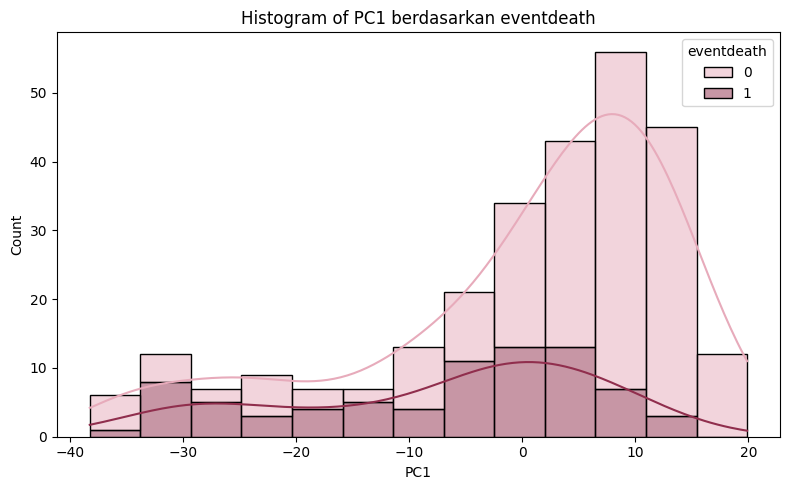

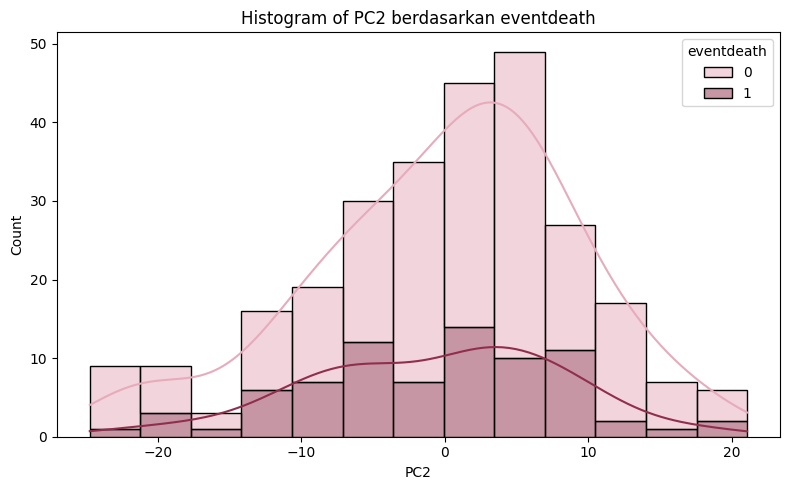

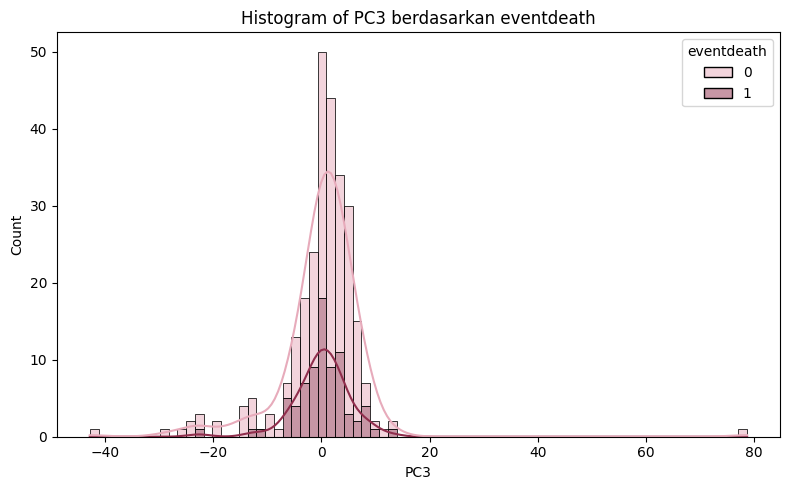

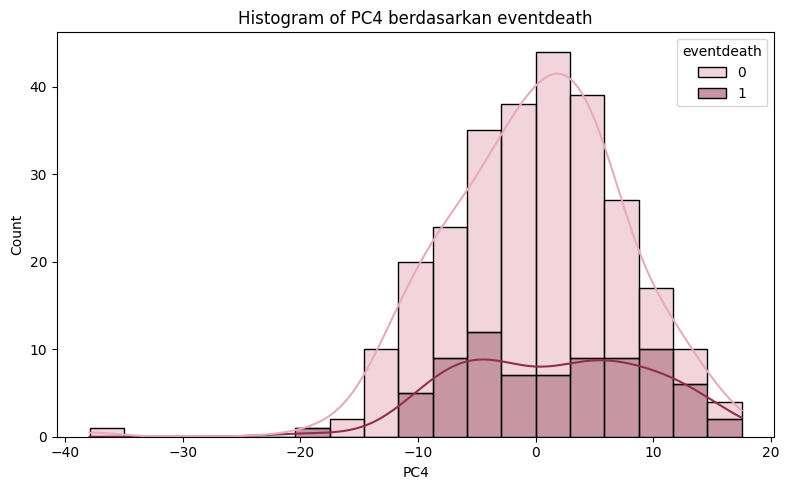

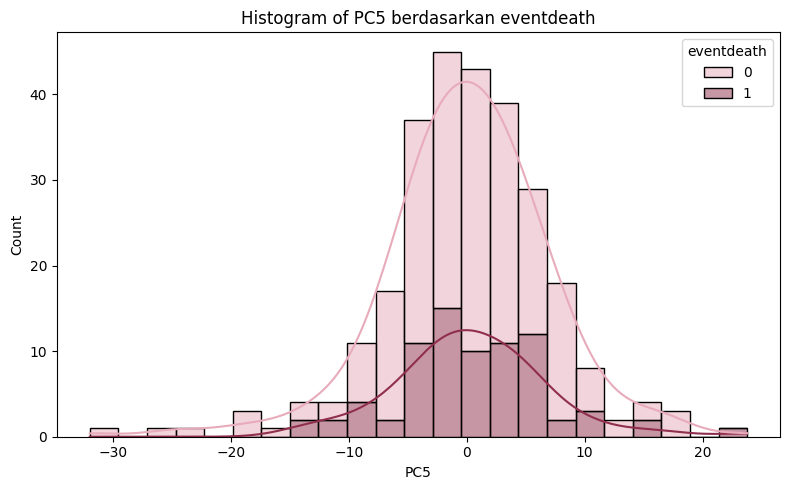

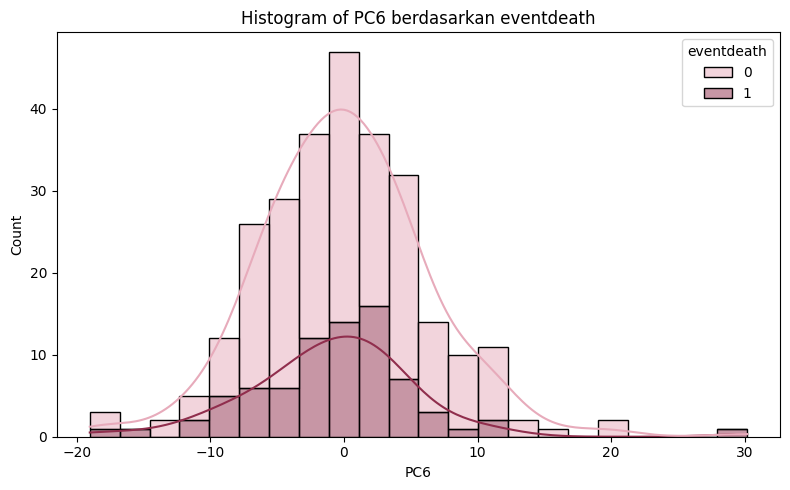

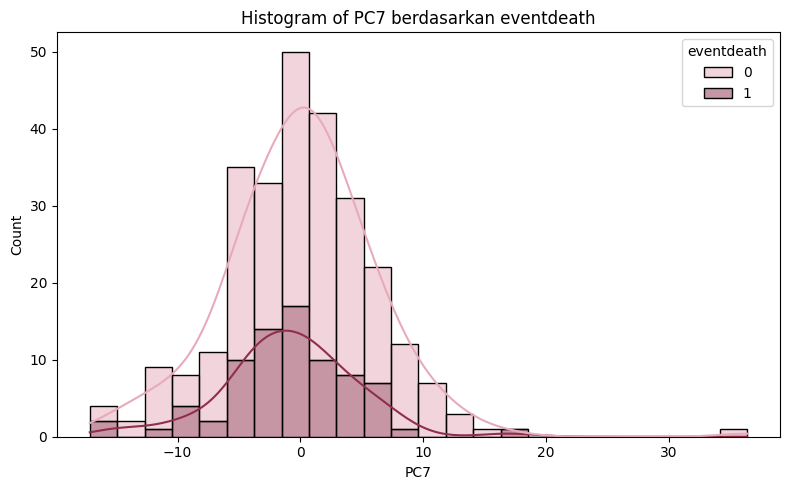

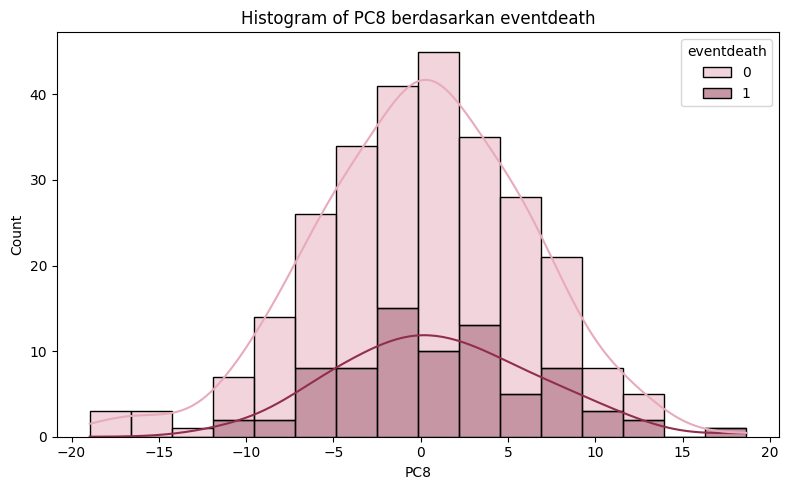

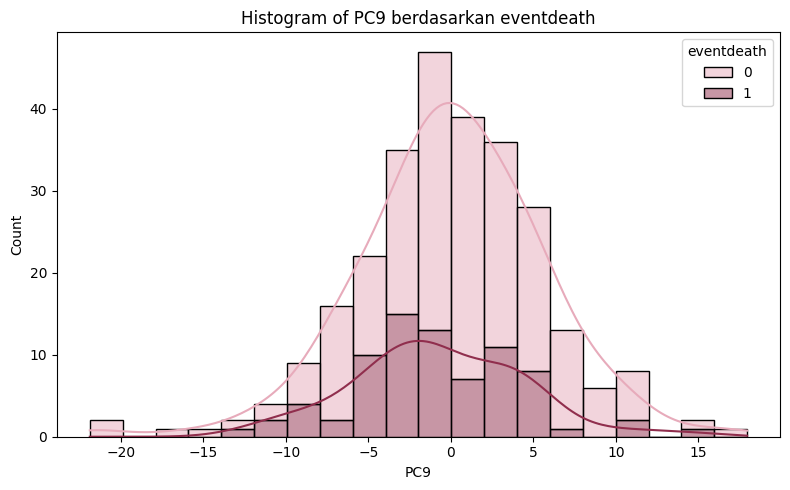

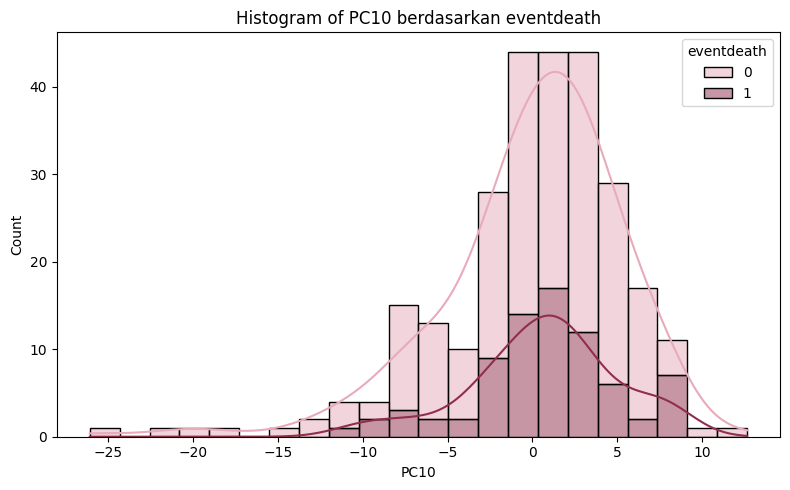

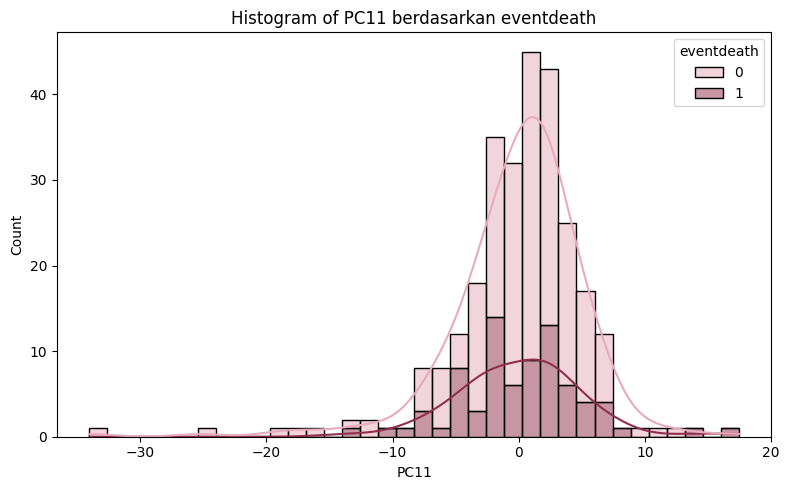

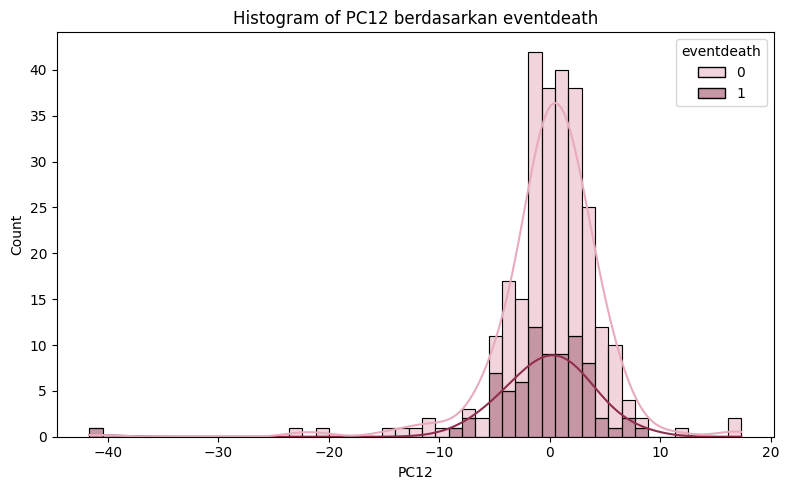

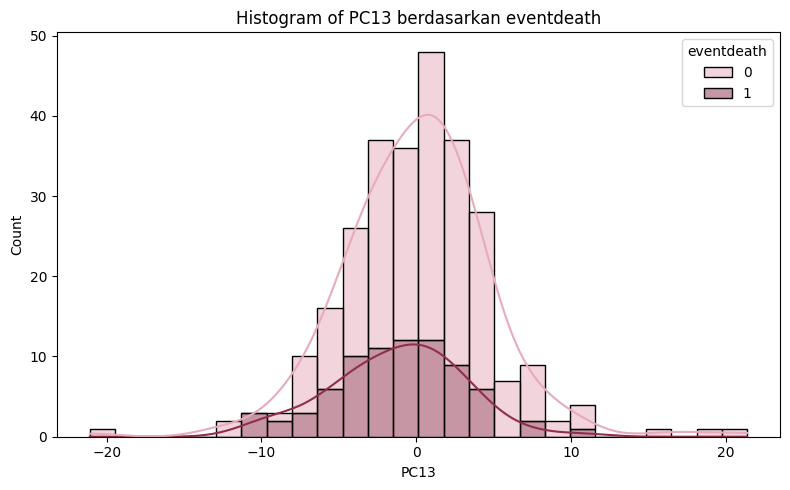

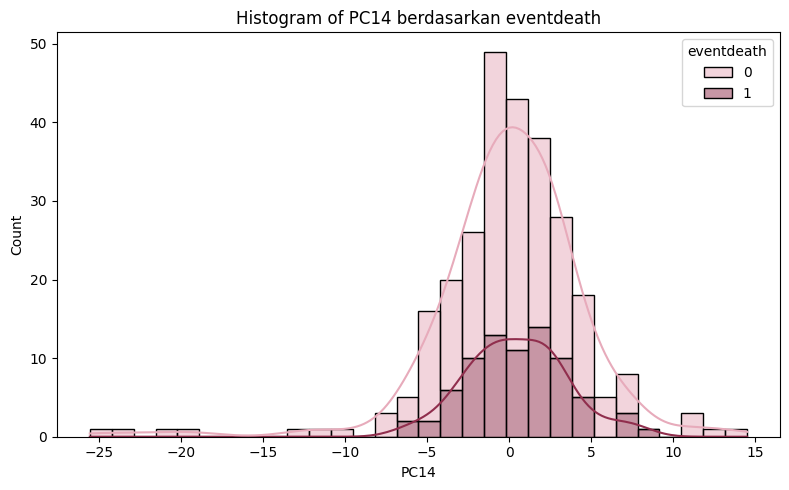

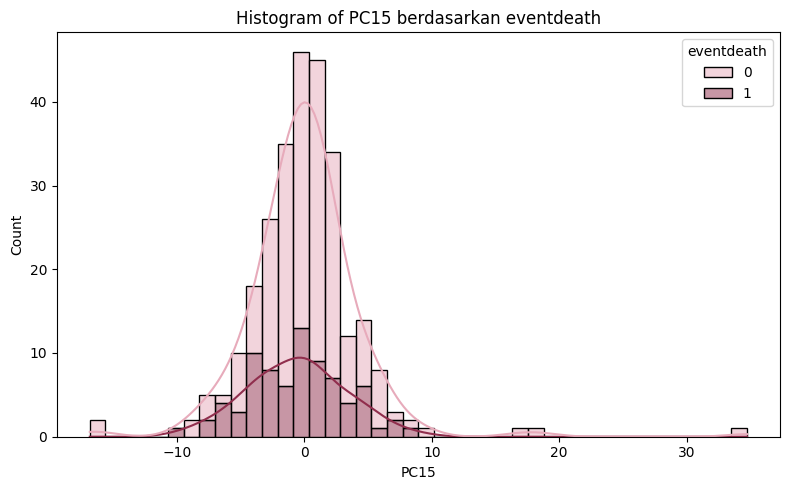

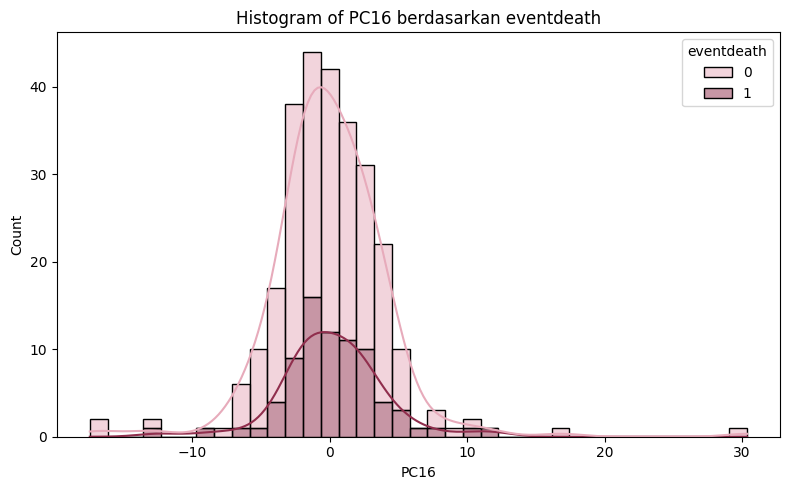

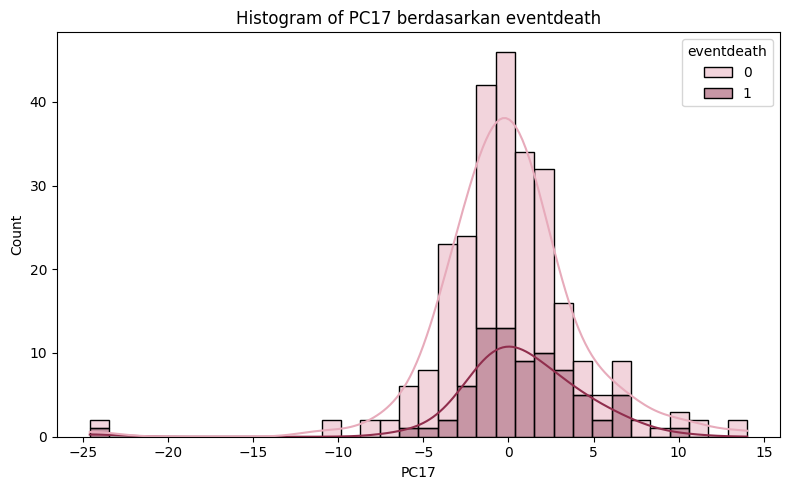

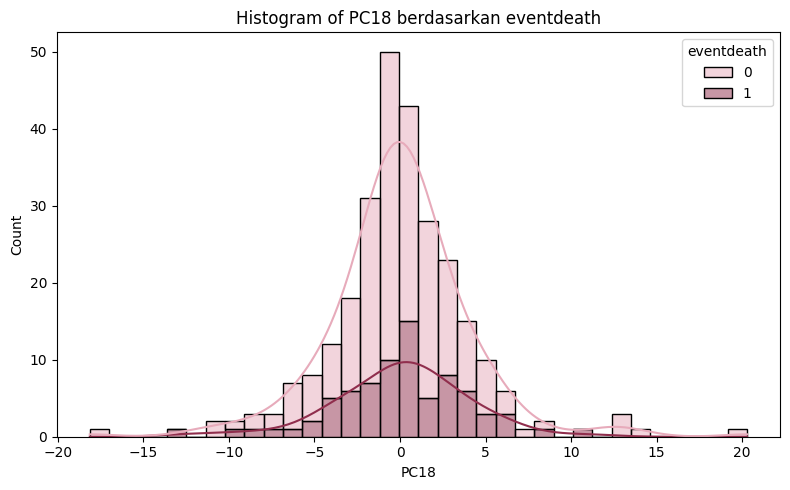

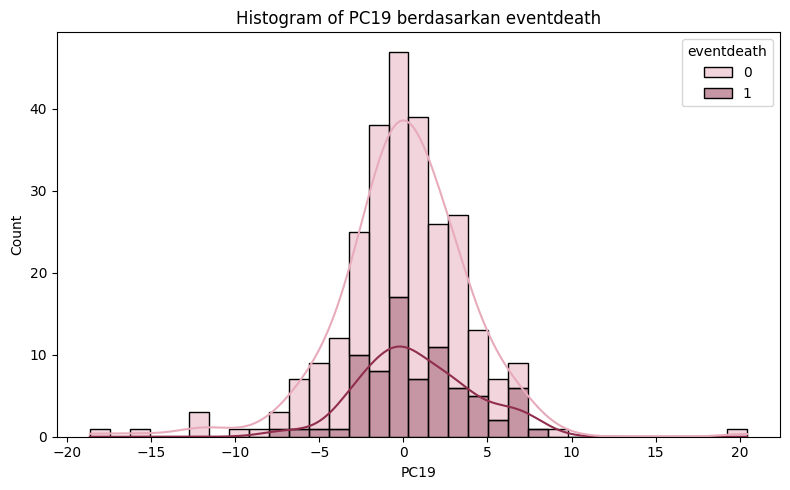

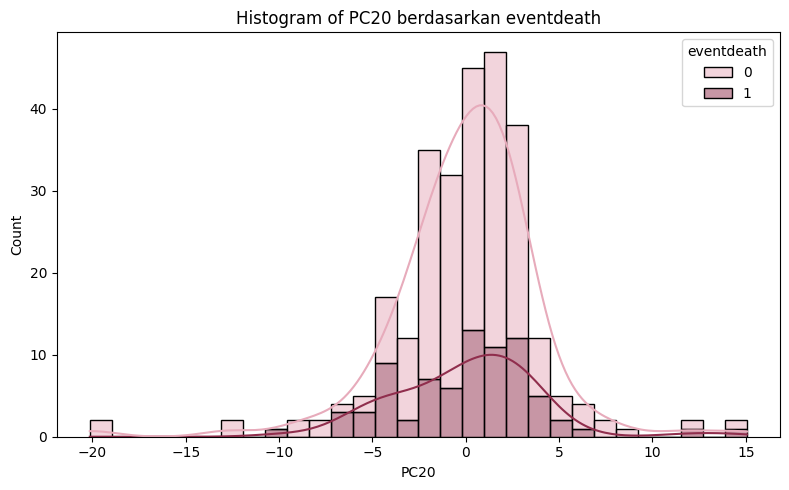

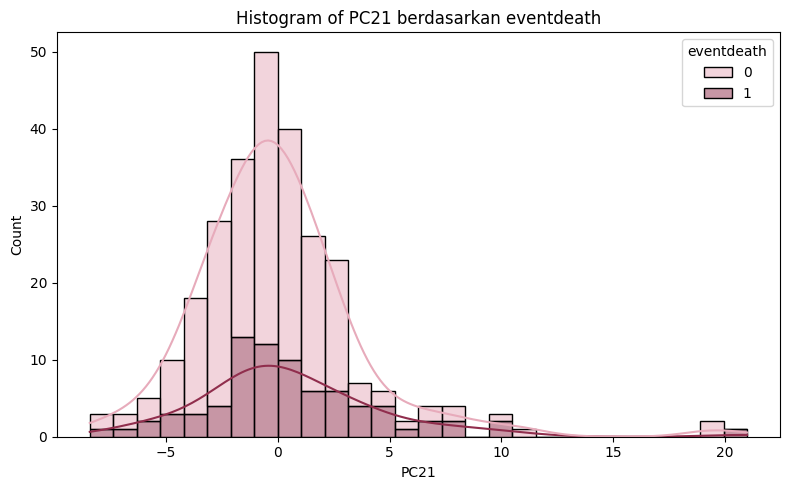

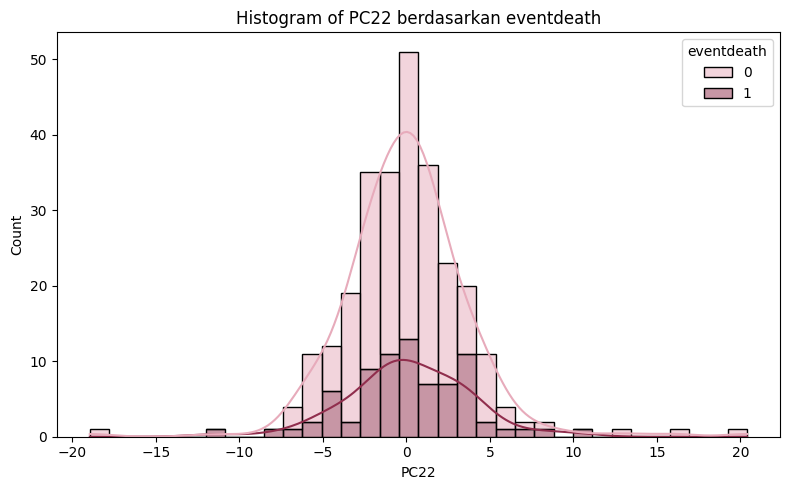

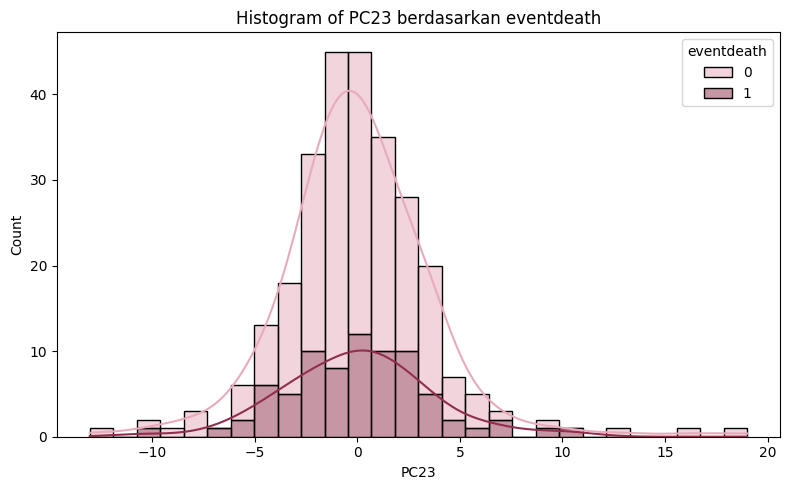

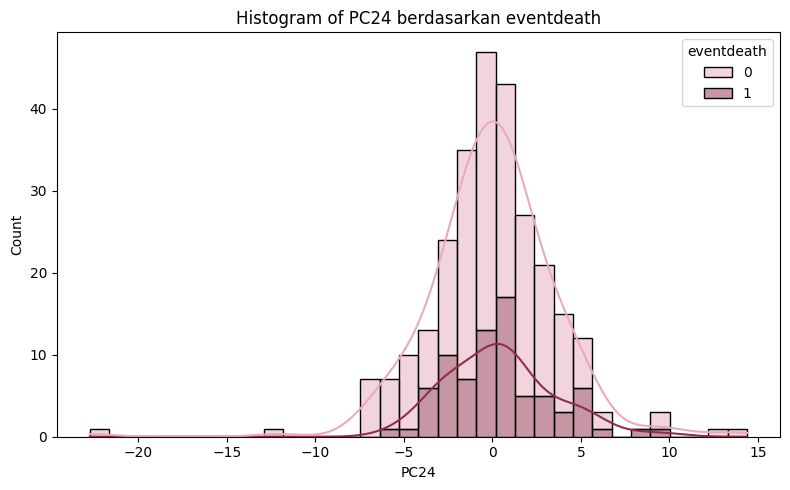

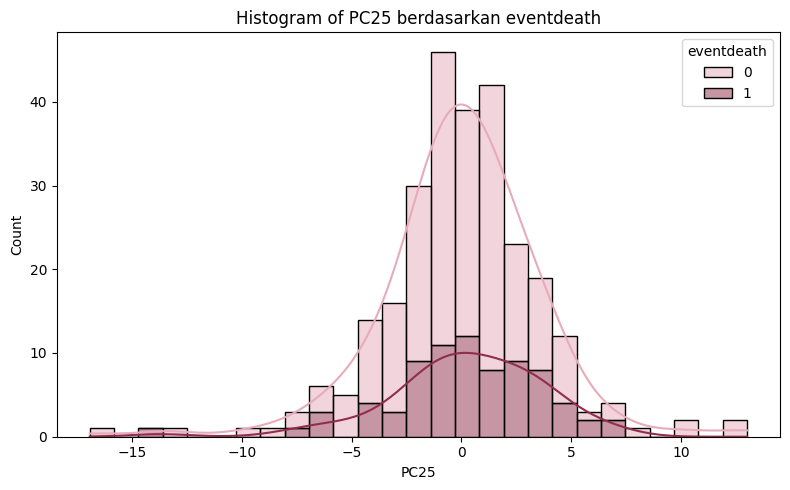

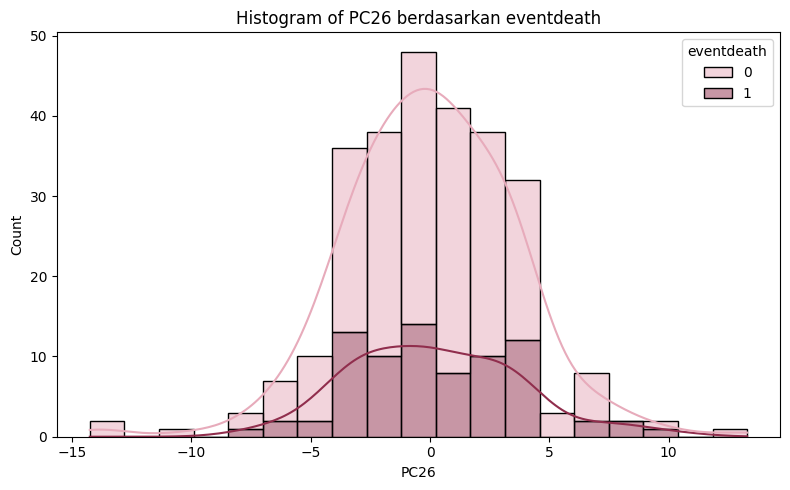

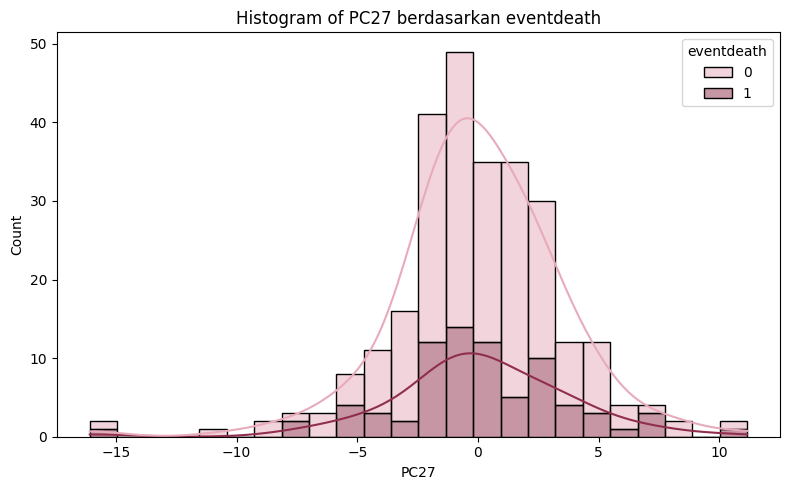

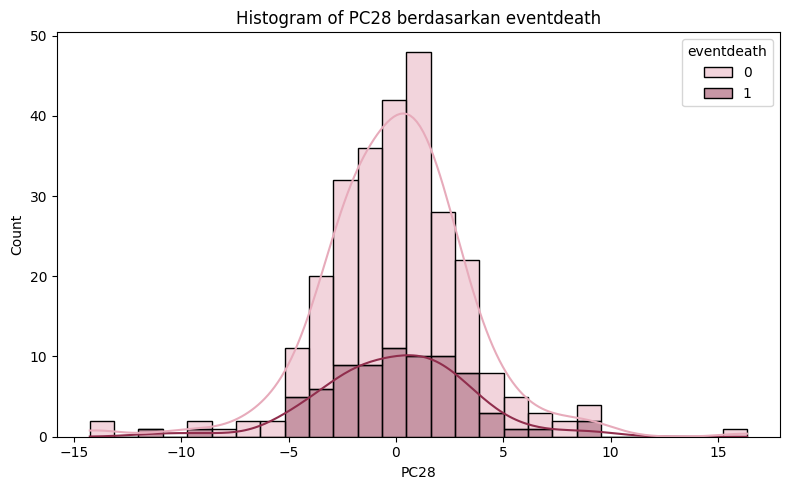

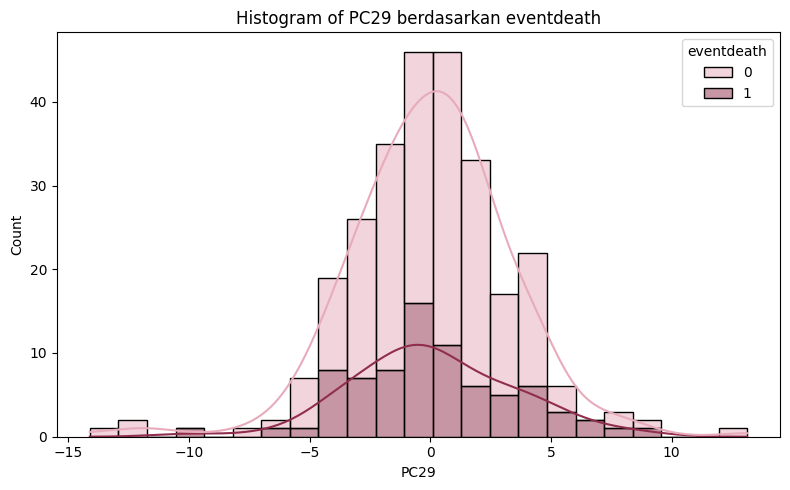

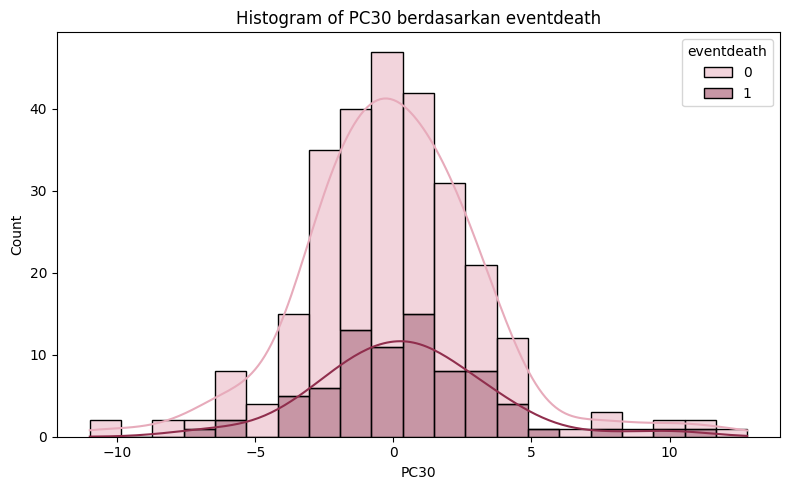

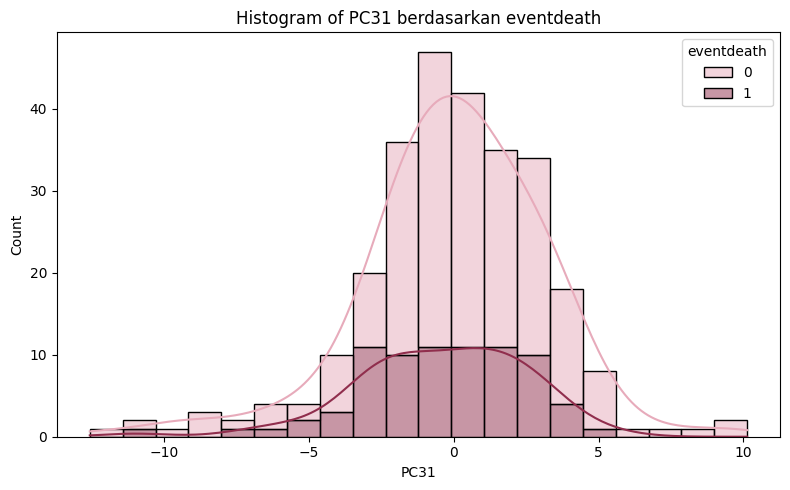

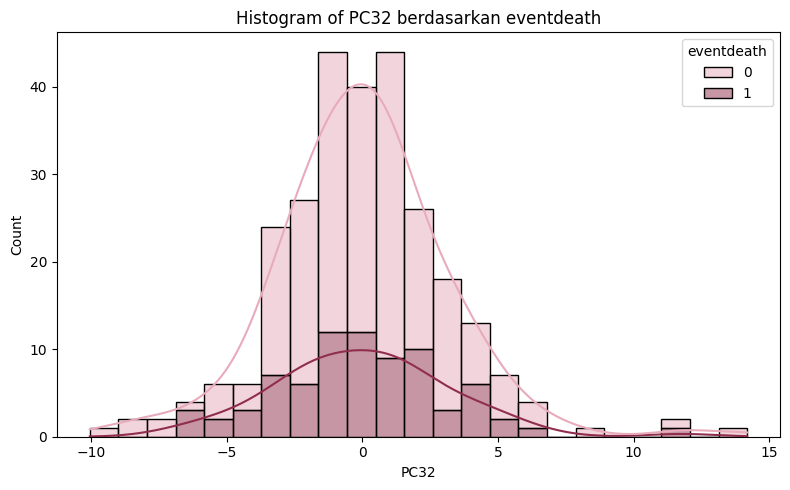

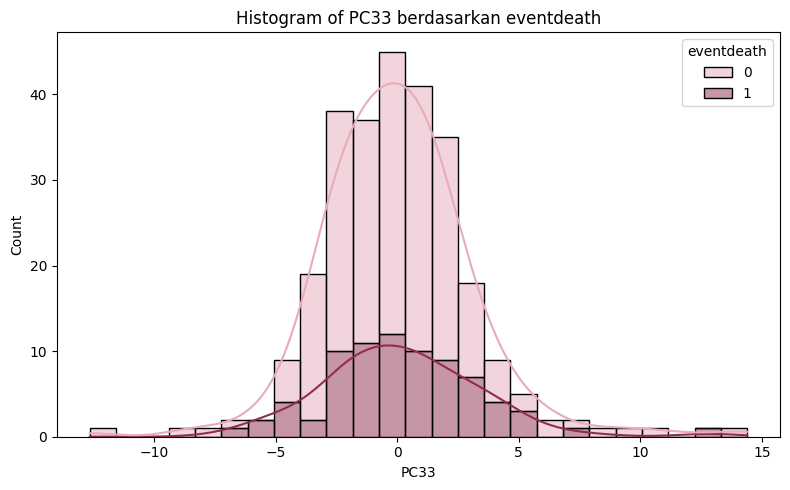

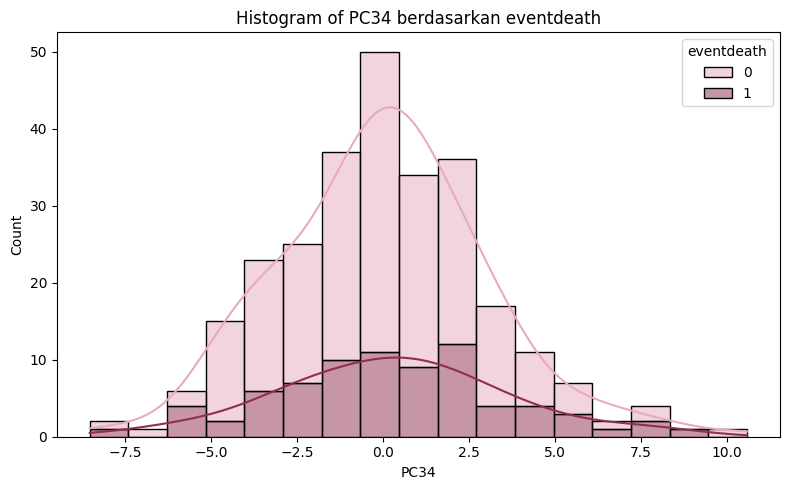

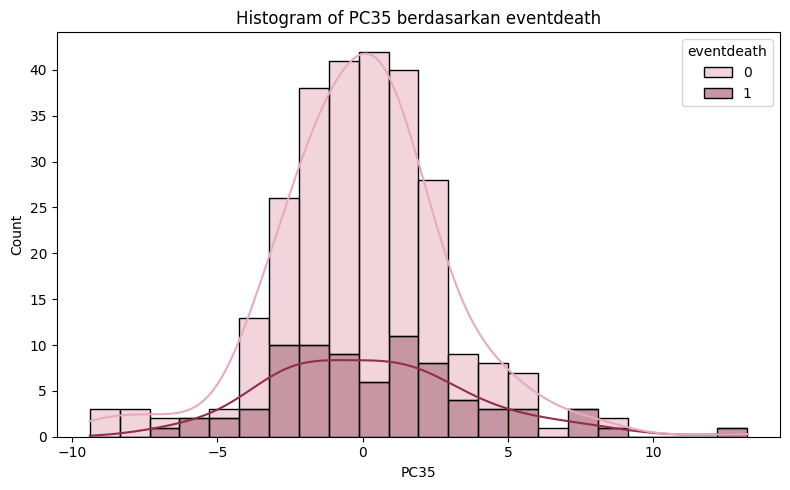

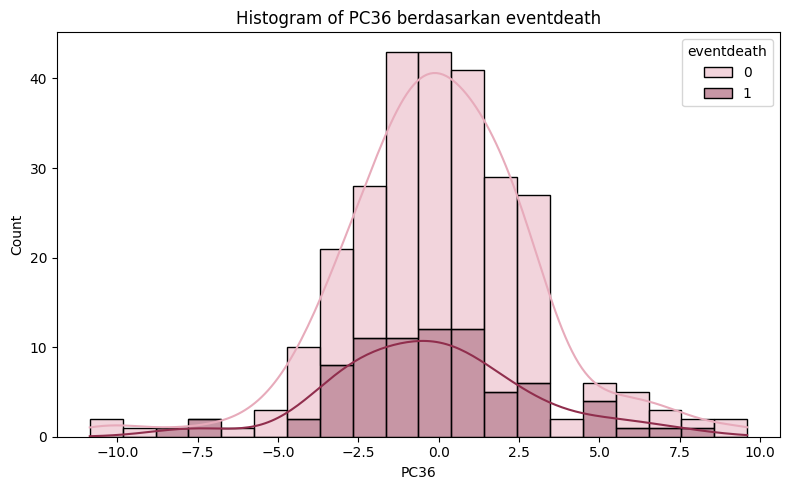

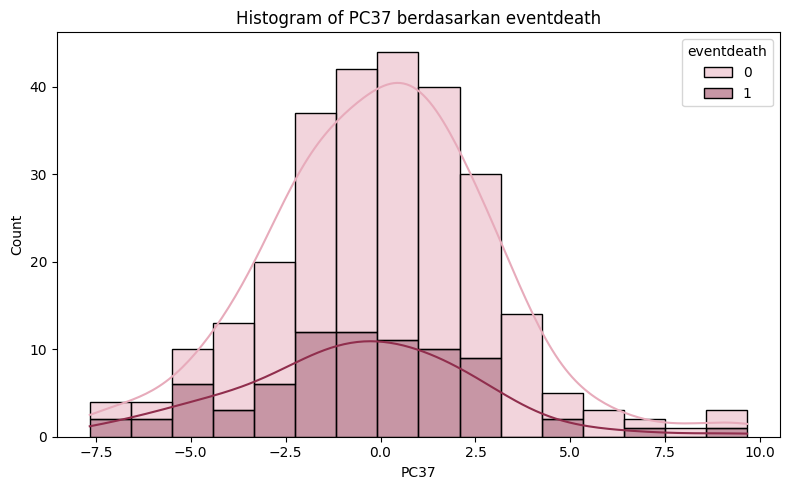

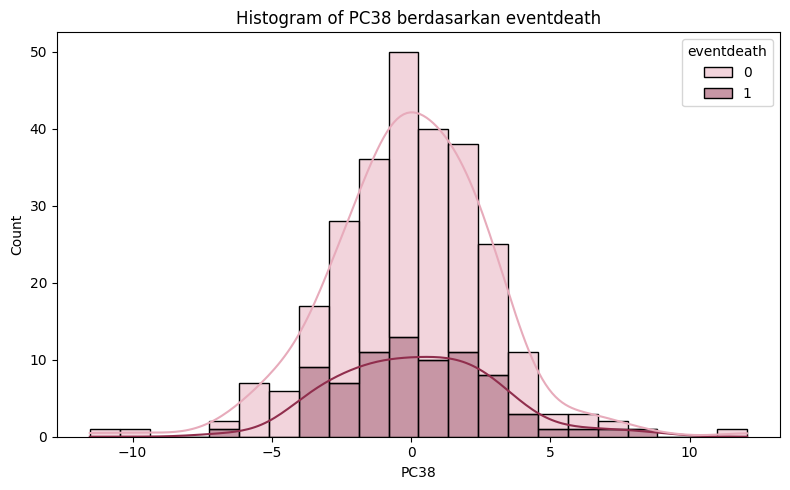

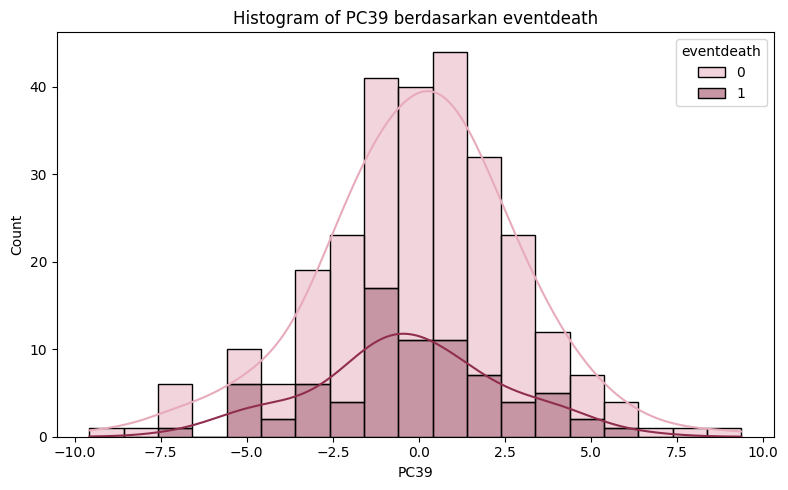

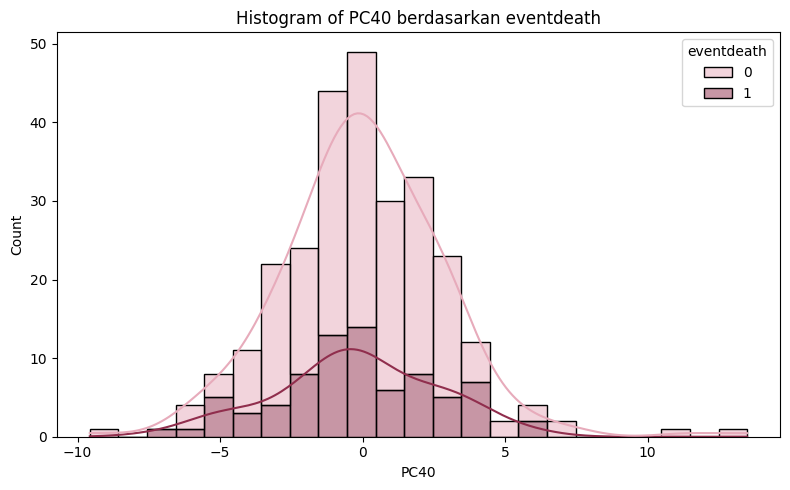

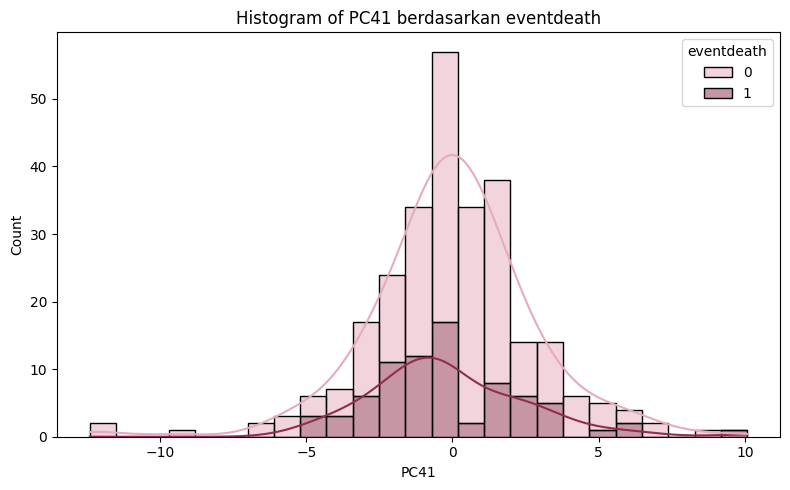

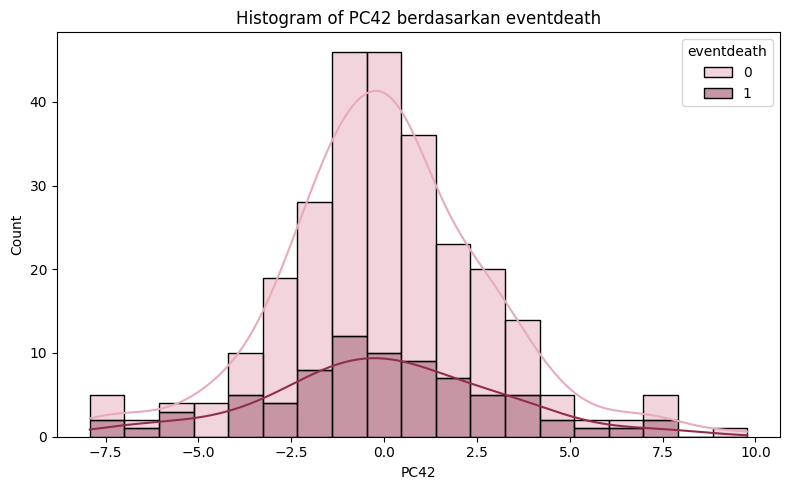

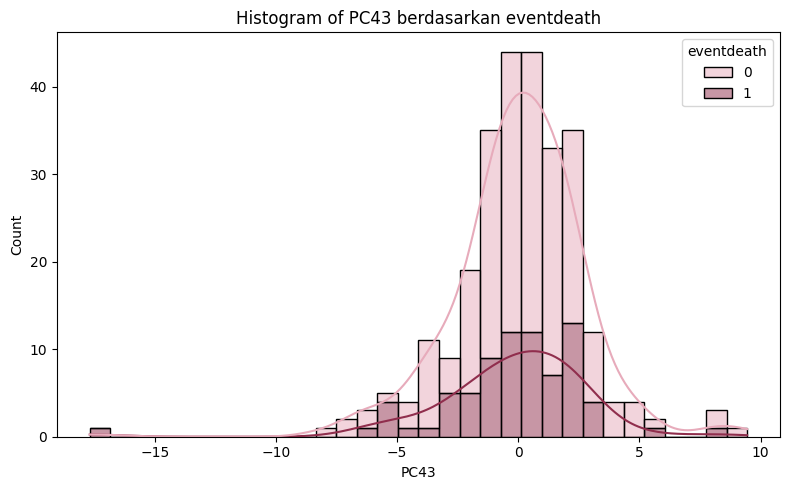

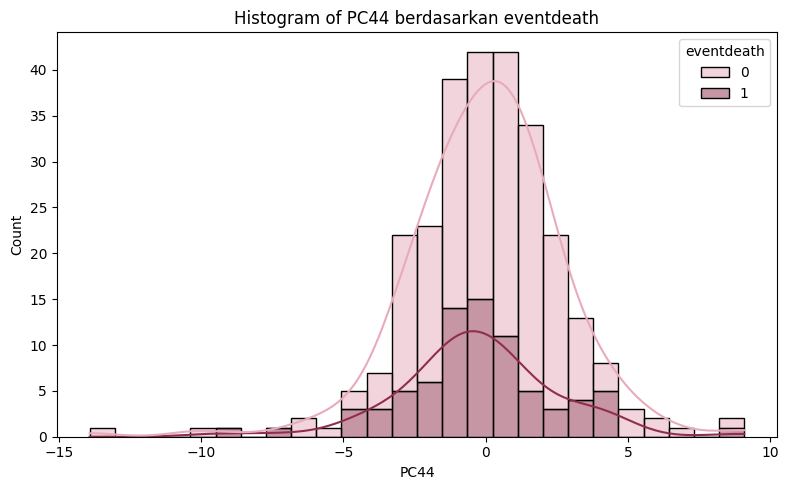

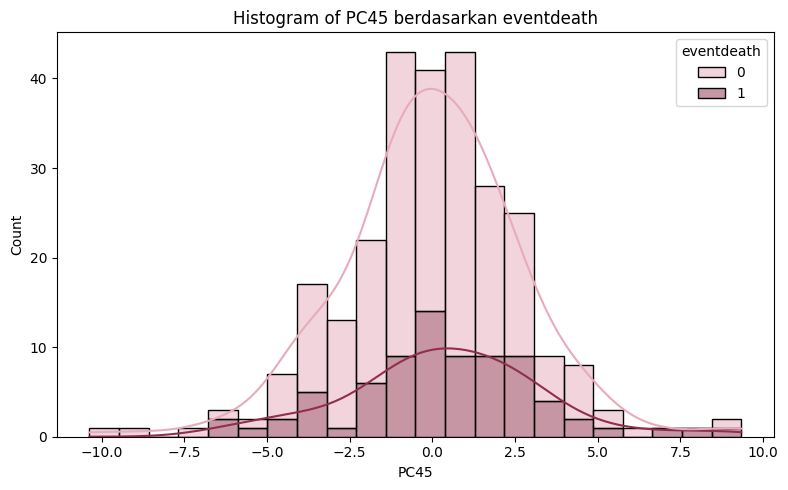

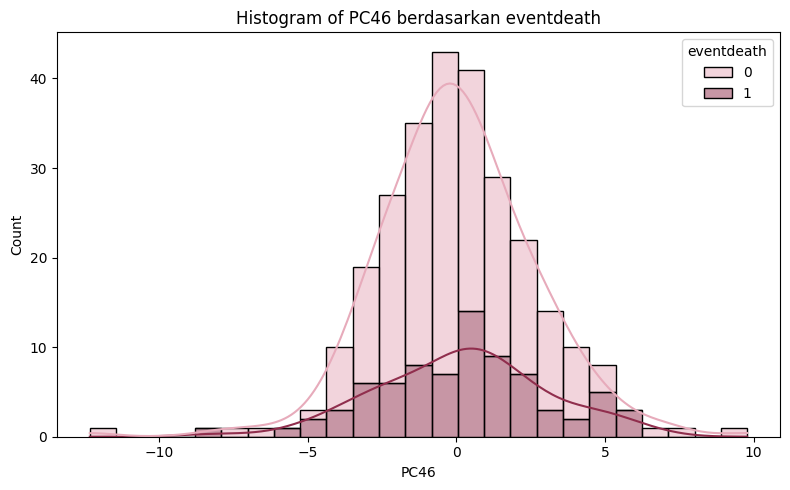

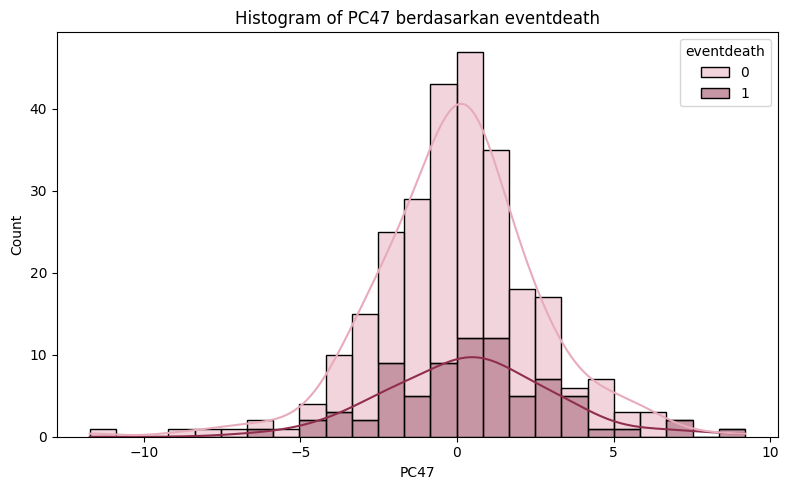

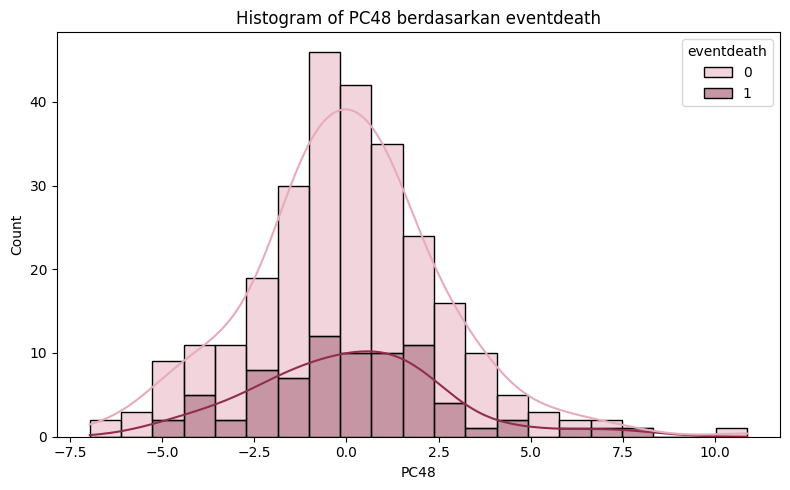

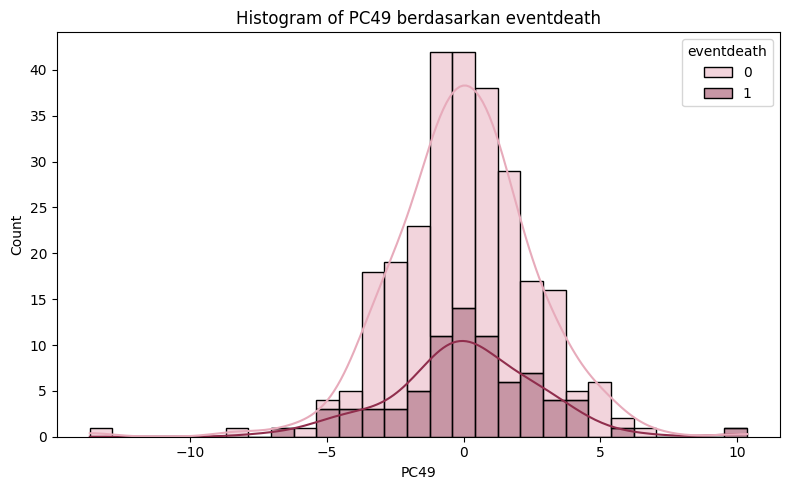

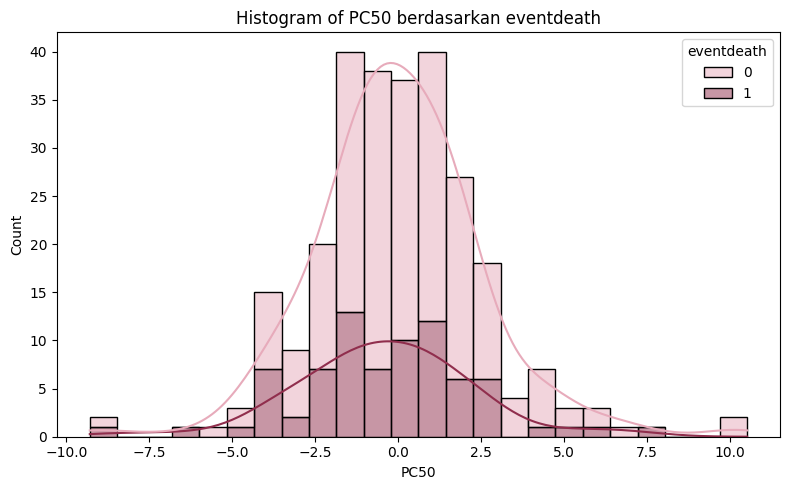

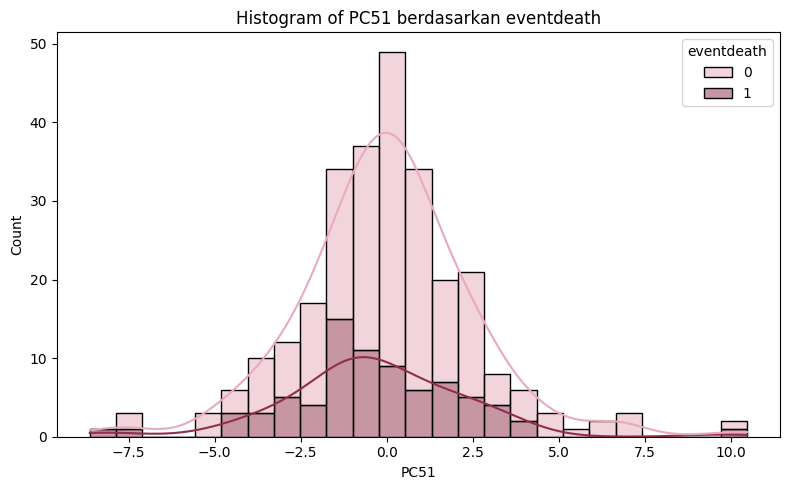

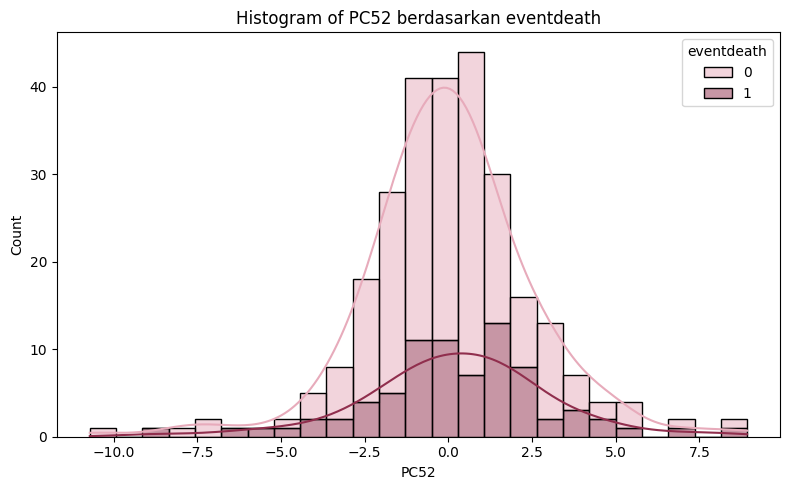

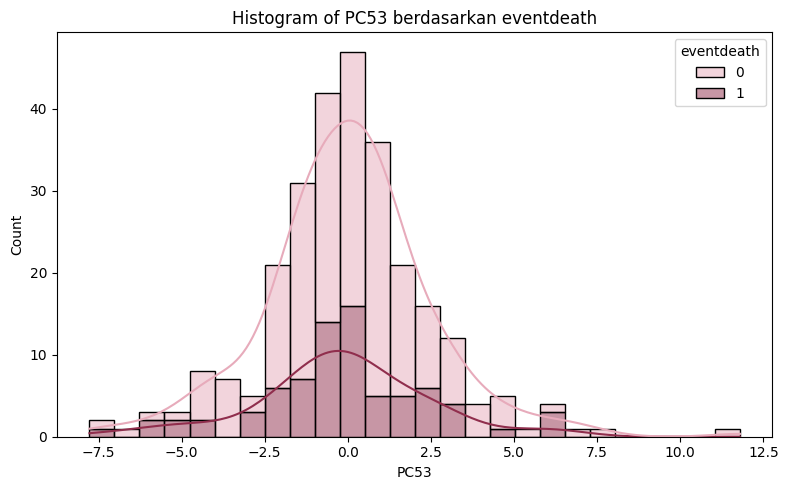

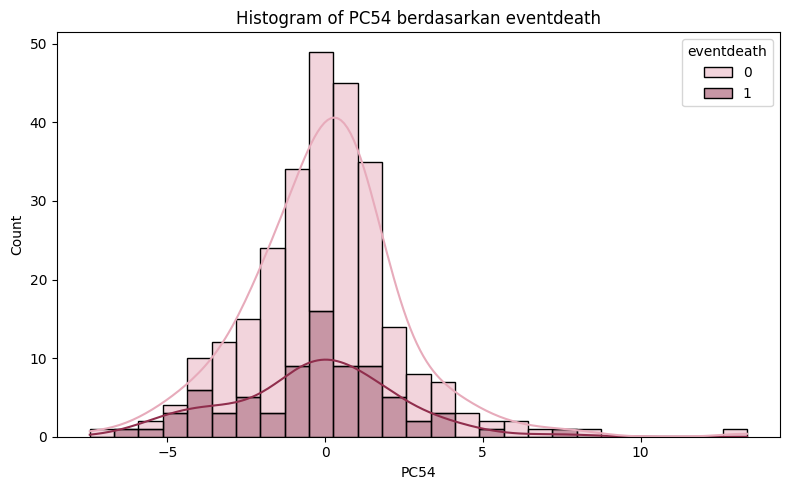

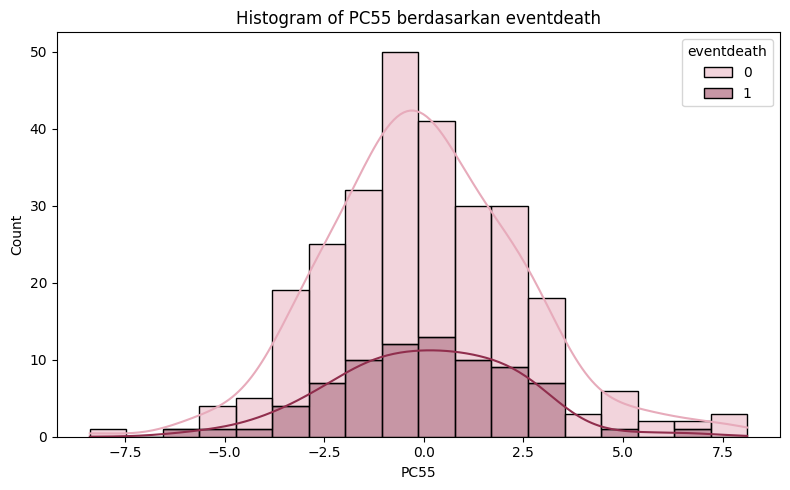

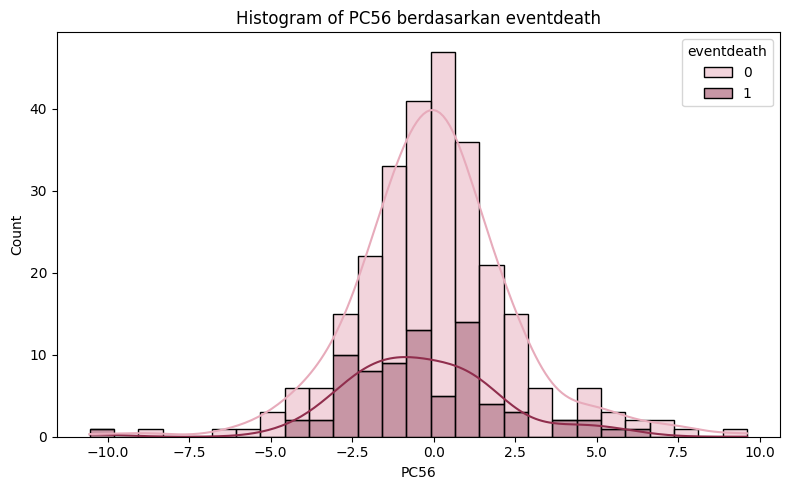

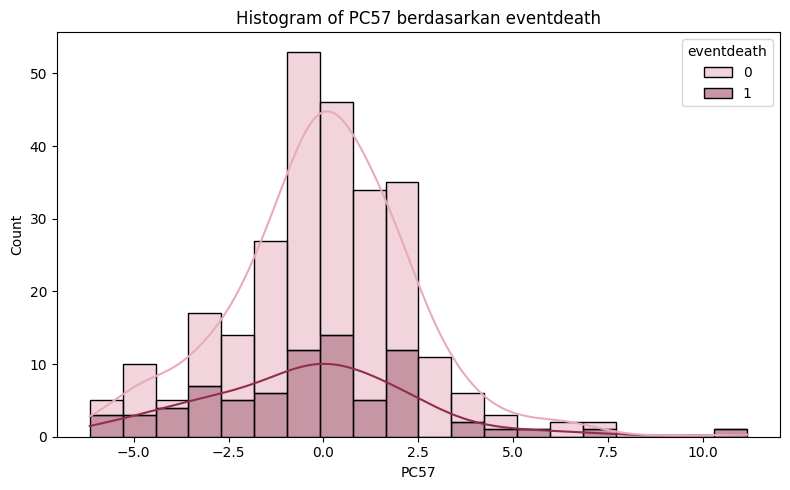

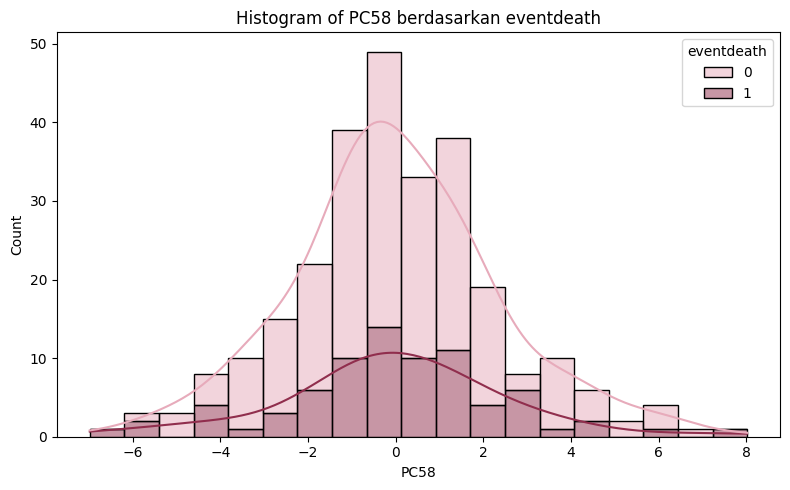

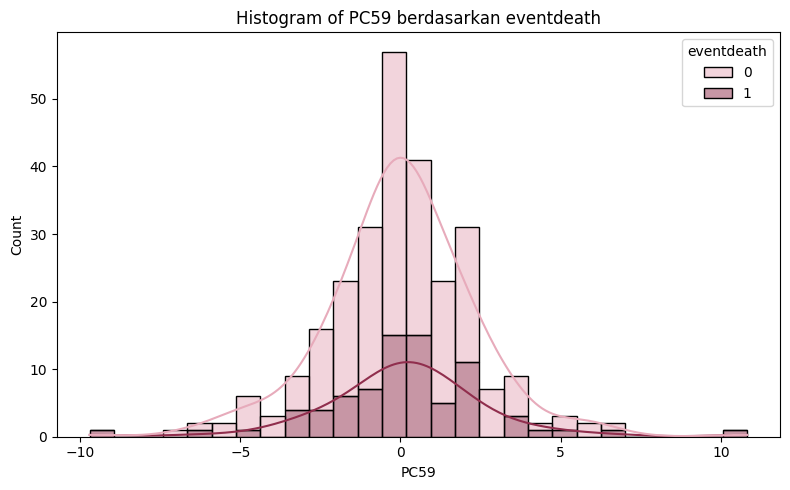

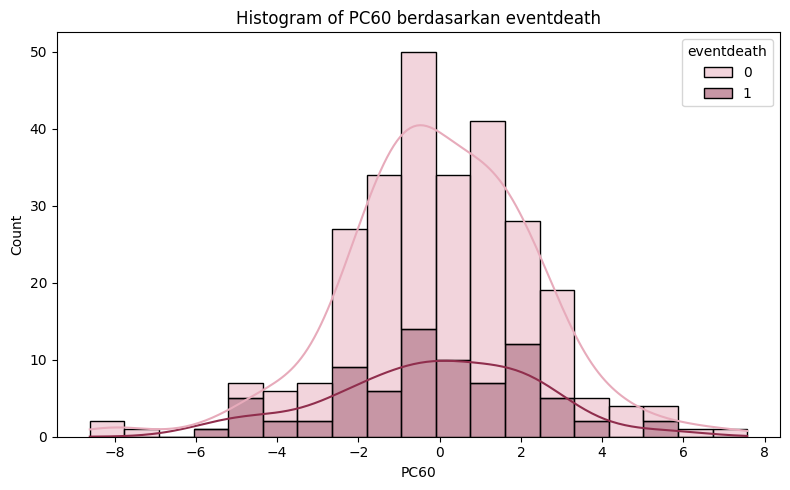

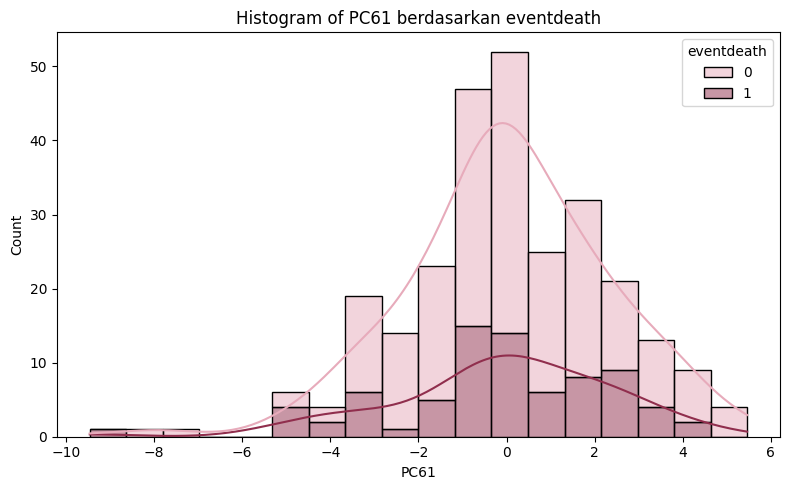

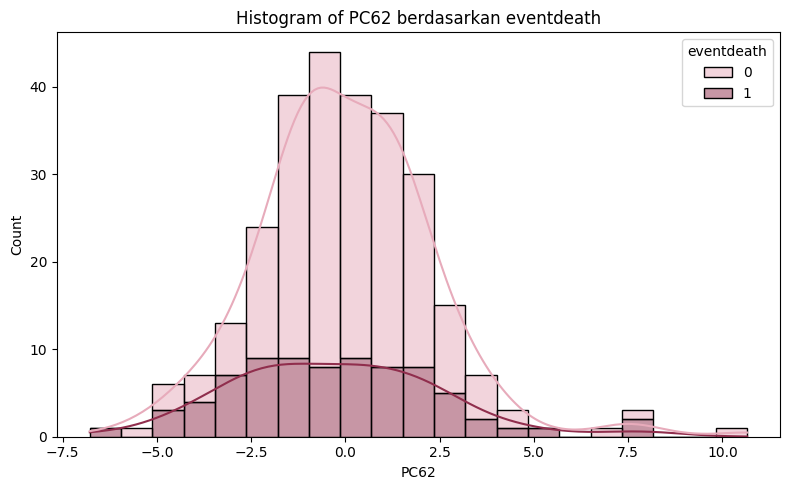

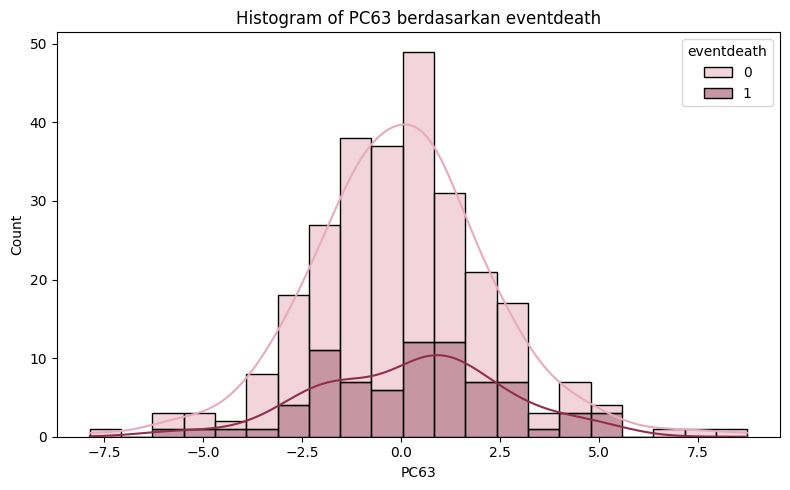

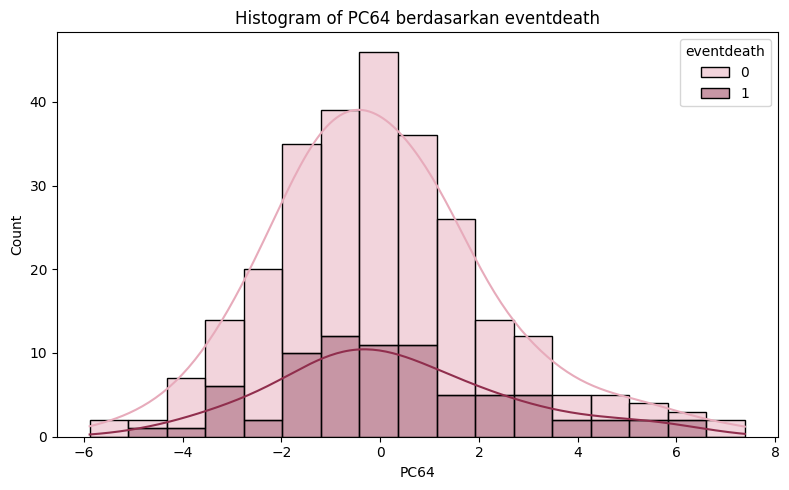

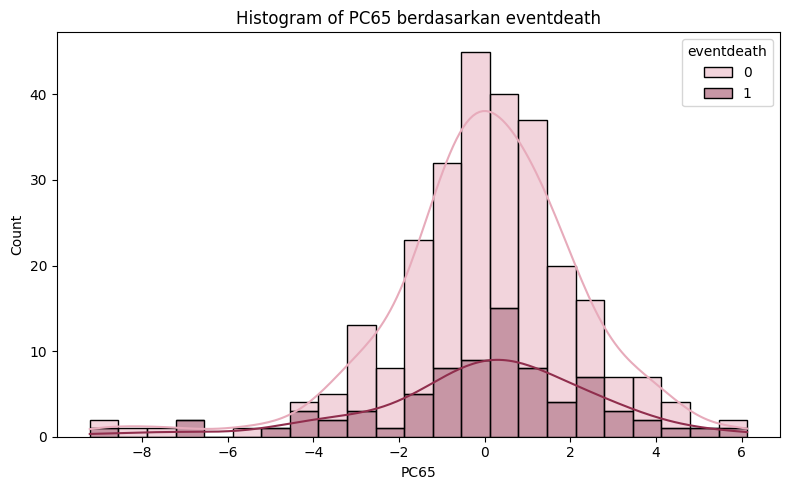

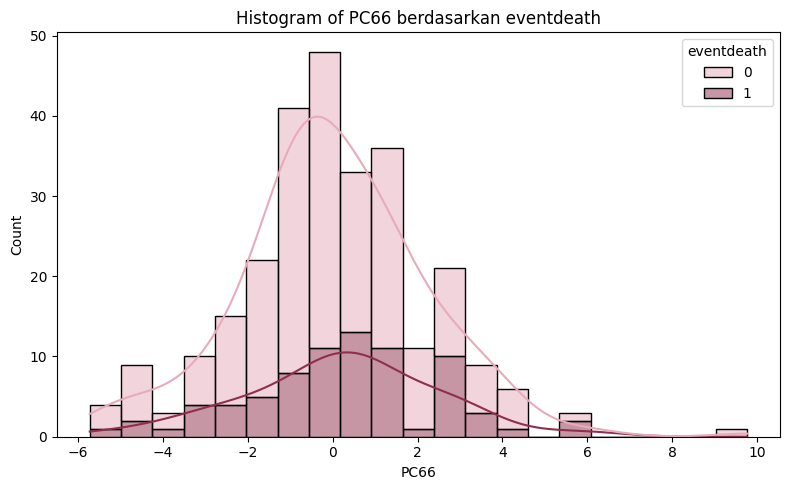

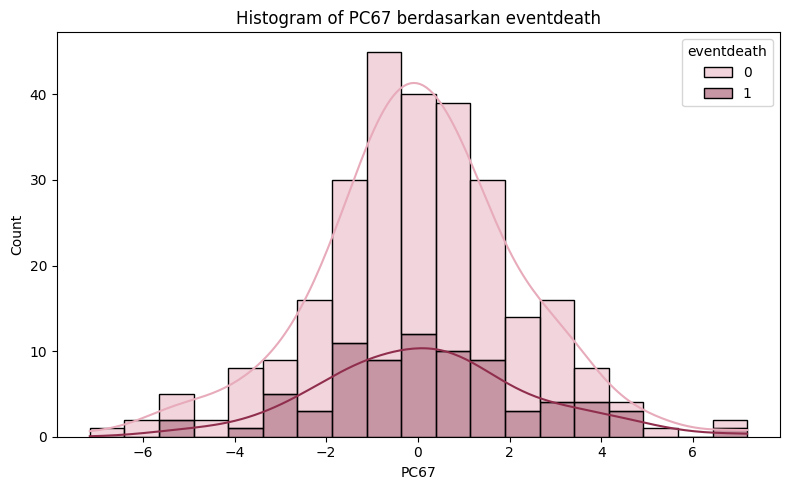

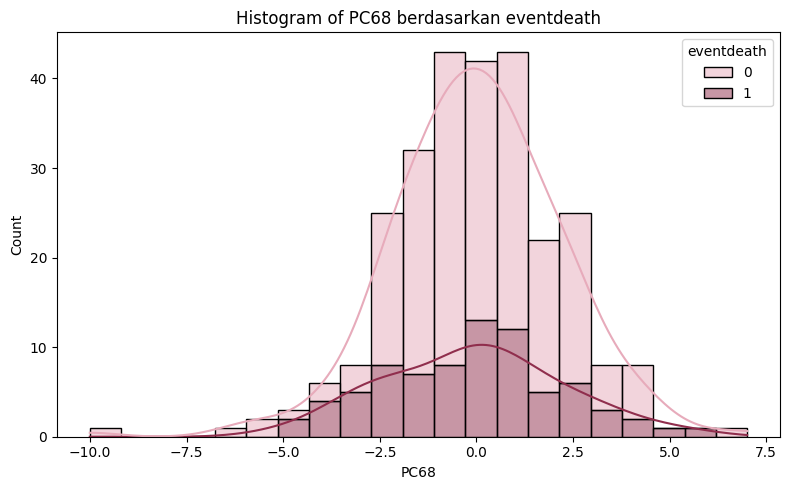

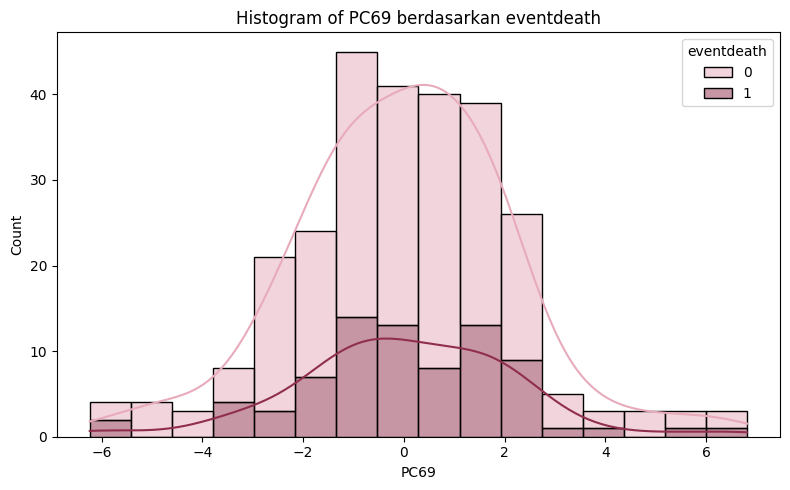

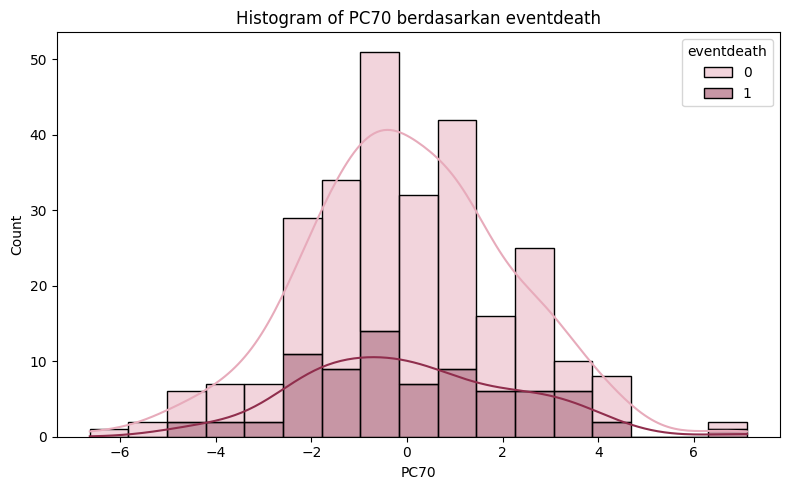

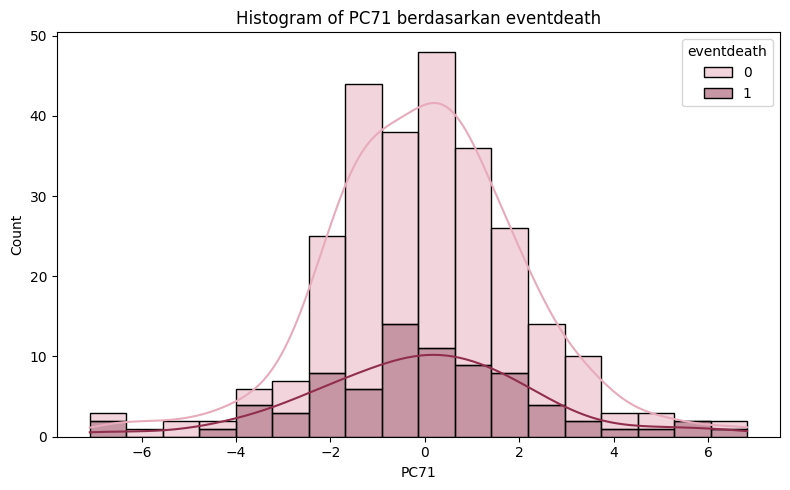

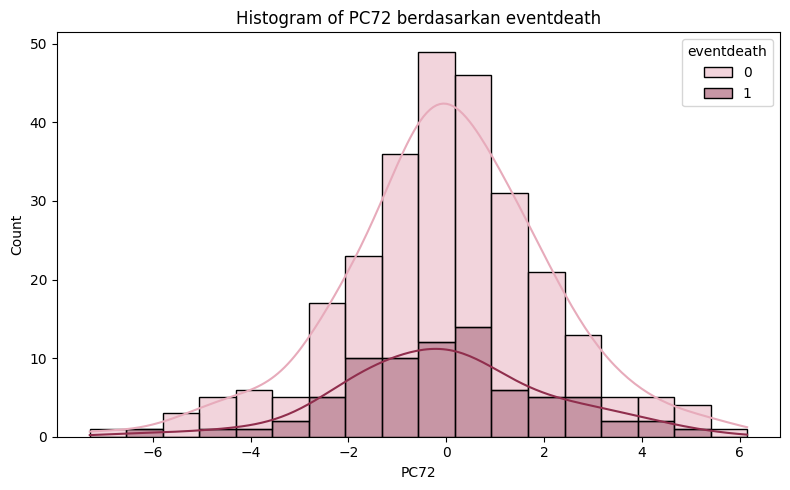

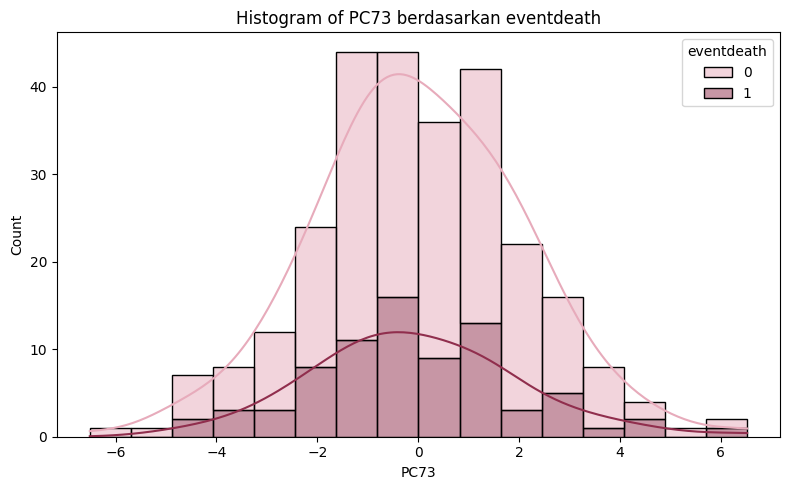

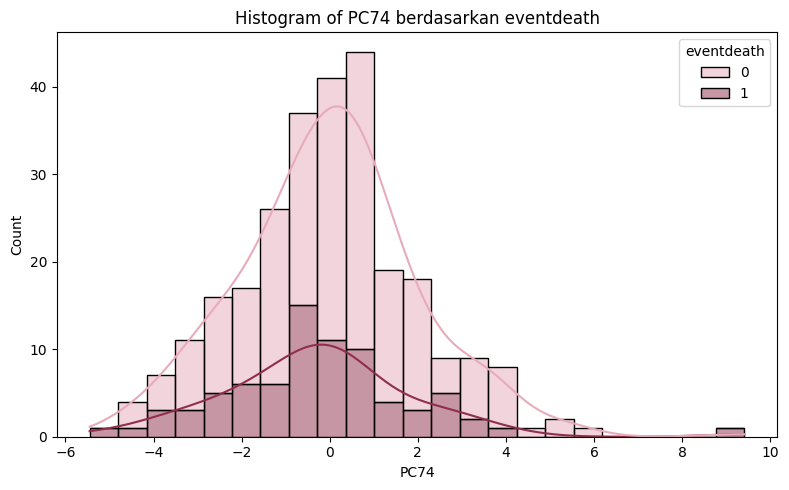

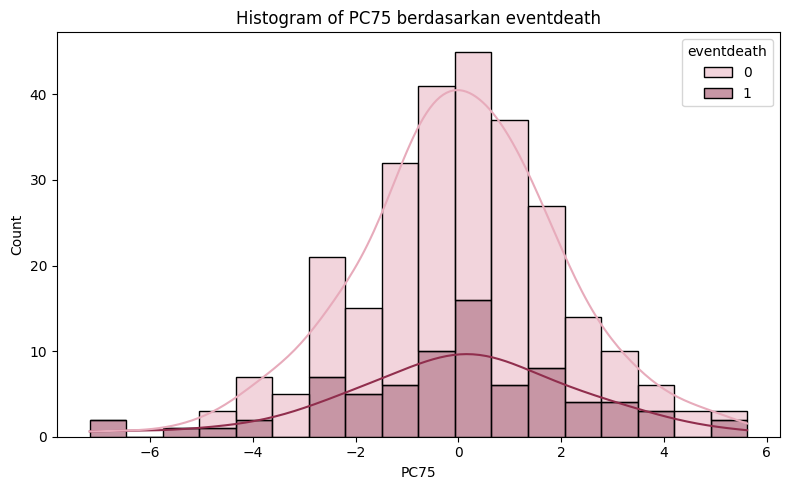

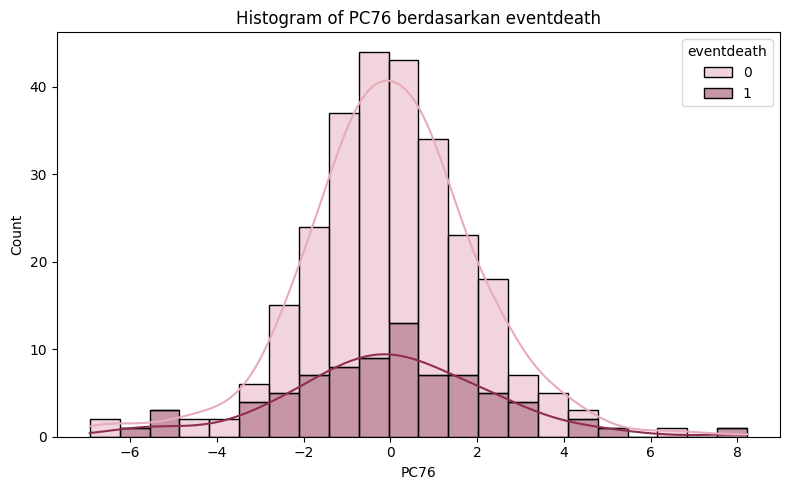

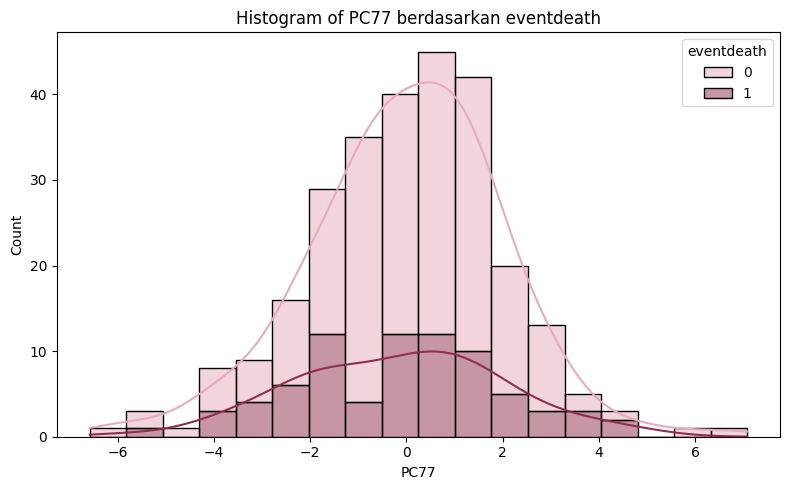

In [72]:
cols = [f'PC{i}' for i in range(1, 78)]

for col in cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_pca, x=col, hue='eventdeath', kde=True, multiple="stack", palette=["#e7abbb", "#902e4d"])
    plt.title(f'Histogram of {col} berdasarkan eventdeath')
    plt.tight_layout()
    plt.show()


### 4.2 Cek Korelasi Antar Variabel
Cek hubungan antar variabel numerik menggunakan korelasi Pearson.


In [73]:
import numpy as np
import pandas as pd

df_korelasi = data_pca.drop(columns=['eventdeath'], errors='ignore')

corr_matrix = df_korelasi.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = [(col1, col2, corr_matrix.loc[col1, col2])
                   for col1 in upper.columns
                   for col2 in upper.index
                   if pd.notnull(upper.loc[col2, col1]) and upper.loc[col2, col1] > 0.85]

if high_corr_pairs:
    print("Variabel dengan korelasi > 0.85:")
    for c1, c2, val in high_corr_pairs:
        print(f"{c1} & {c2}: {val:.3f}")
else:
    print("Tidak ada variabel dengan korelasi tinggi (>0.85).")


Tidak ada variabel dengan korelasi tinggi (>0.85).



## 5. Uji Asumsi Proportional Hazard


In [74]:
cph_test = CoxPHFitter()
cph_test.fit(data_pca, duration_col='timerecurrence', event_col='eventdeath')

results = proportional_hazard_test(cph_test, data_pca, time_transform='rank')

summary_df = results.summary

# Filter p-value < 0.05 (melanggar asumsi PH)
vars_p_less_05 = summary_df[summary_df['p'] < 0.05]

if vars_p_less_05.empty:
    print("Tidak ada variabel dengan p-value < 0.05 (semua memenuhi asumsi PH)")
else:
    print("Variabel dengan p-value < 0.05 (melanggar asumsi PH):")
    for var_name, row in vars_p_less_05.iterrows():
        print(f"{var_name}: p-value = {row['p']:.4f}")


Variabel dengan p-value < 0.05 (melanggar asumsi PH):
PC10: p-value = 0.0098
PC36: p-value = 0.0338
PC68: p-value = 0.0047
PC69: p-value = 0.0021
angioinv: p-value = 0.0052



## 6. Modeling Cox


### Stratified Cox Model
Karena beberapa variabel melanggar asumsi PH, maka dibuat stratifikasi berdasarkan variabel yang kategorikal.

In [75]:
cph_stratified = CoxPHFitter()
cph_stratified.fit(data, duration_col='timerecurrence', event_col='eventdeath', strata=['angioinv'])
cph_stratified.print_summary()

<lifelines.CoxPHFitter: fitted with 272 total observations, 195 right-censored observations>
             duration col = 'timerecurrence'
                event col = 'eventdeath'
                   strata = angioinv
      baseline estimation = breslow
   number of observations = 272
number of events observed = 77
   partial log-likelihood = -312.13
         time fit was run = 2025-05-28 05:46:32 UTC

---
            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                   
age        -0.05      0.95      0.02           -0.10           -0.01                0.91                0.99
chemo      -0.50      0.61      0.30           -1.09            0.09                0.34                1.10
hormonal   -0.18      0.84      0.45           -1.06            0.71                0.35                2.03
amputation  0.01      1.01      0.25           -0.48            0.51                0.62                1.66
histtype    0.35      1.42      0.20           -0.04            0.74                0.96                2.11
diam        0.02      1.02      0.01           -0.01            0.05                0.99                1.05
posnodes    0.08      1.08      0.06           -0.04            0.19                0.96                1.21
grade       0.98      2.67      0.20            0.58            1.38                1.79                3.99
lymphinfil -0.38      0.69      0.20           -0.78            0.02                0.46                1.02

            cmp to     z      p  -log2(p)
covariate                                
age           0.00 -2.46   0.01      6.17
chemo         0.00 -1.66   0.10      3.36
hormonal      0.00 -0.39   0.69      0.53
amputation    0.00  0.04   0.96      0.05
histtype      0.00  1.75   0.08      3.65
diam          0.00  1.56   0.12      3.06
posnodes      0.00  1.33   0.18      2.46
grade         0.00  4.81 <0.005     19.30
lymphinfil    0.00 -1.85   0.06      3.97
---
Concordance = 0.75
Partial AIC = 642.25
log-likelihood ratio test = 49.67 on 9 df
-log2(p) of ll-ratio test = 22.94

### Extended Cox Model
Extended Cox digunakan untuk memasukkan variabel-variabel yang gagal memenuhi asumsi sebagai variabel yang bergantung waktu dengan menambahkan interaksi antara variabel tersebut dan waktu.

In [76]:
pc_vars = [col for col in data_pca.columns if col.startswith('PC')]

pc_gagal_asumsi = [var for var in pc_vars if var in summary_df.index and summary_df.loc[var, 'p'] < 0.05]
pc_lolos_asumsi = [var for var in pc_vars if var in summary_df.index and summary_df.loc[var, 'p'] >= 0.05]

# Buat variabel time-varying untuk PC yang gagal
for var in pc_gagal_asumsi:
    data_pca[f'{var}_timerecurrence'] = data_pca[var] * data_pca['timerecurrence']

# Buat variabel time-varying untuk angioinv
data_pca['angioinv_timerecurrence'] = data_pca['angioinv'] * data_pca['timerecurrence']

non_pc_vars = [
    'age',
    'chemo',
    'hormonal',
    'amputation',
    'histtype',
    'diam',
    'posnodes',
    'grade',
    'lymphinfil',
    'angioinv_timerecurrence'
]

non_pc_covariates = [var for var in non_pc_vars if var in data_pca.columns]

# Gabungkan dengan variabel PC (lolos + time-varying)
pc_covariates = pc_lolos_asumsi + [f'{var}_timerecurrence' for var in pc_gagal_asumsi if f'{var}_timerecurrence' in data_pca.columns]

# Gabungkan semua covariates, non-PC dulu
covariates = non_pc_covariates + pc_covariates

cph_ext = CoxPHFitter()
cph_ext.fit(data_pca[covariates + ['timerecurrence', 'eventdeath']], duration_col='timerecurrence', event_col='eventdeath')
cph_ext.print_summary()


<lifelines.CoxPHFitter: fitted with 272 total observations, 195 right-censored observations>
             duration col = 'timerecurrence'
                event col = 'eventdeath'
      baseline estimation = breslow
   number of observations = 272
number of events observed = 77
   partial log-likelihood = -237.27
         time fit was run = 2025-05-28 05:46:32 UTC

---
                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                
age                      0.03      1.03      0.05           -0.06            0.12                0.94                1.13
chemo                   -1.55      0.21      0.75           -3.03           -0.08                0.05                0.92
hormonal                -1.85      0.16      0.88           -3.58           -0.12                0.03                0.89
amputation              -0.10      0.91      0.57           -1.22            1.03                0.30                2.79
histtype                -0.21      0.81      0.36           -0.90            0.49                0.40                1.64
diam                     0.02      1.02      0.03           -0.03            0.08                0.97                1.08
posnodes                 0.40      1.49      0.13            0.14            0.66                1.15                1.93
grade                    3.03     20.76      0.54            1.98            4.08                7.27               59.28
lymphinfil              -0.62      0.54      0.50           -1.61            0.36                0.20                1.44
angioinv_timerecurrence -0.86      0.42      0.12           -1.10           -0.61                0.33                0.54
PC1                     -0.00      1.00      0.02           -0.05            0.05                0.95                1.05
PC2                     -0.04      0.96      0.04           -0.12            0.04                0.88                1.04
PC3                      0.22      1.25      0.06            0.10            0.35                1.11                1.42
PC4                      0.41      1.50      0.10            0.22            0.60                1.25                1.81
PC5                     -0.17      0.84      0.07           -0.32           -0.03                0.73                0.97
PC6                     -0.21      0.81      0.06           -0.33           -0.10                0.72                0.90
PC7                      0.28      1.33      0.06            0.17            0.40                1.18                1.49
PC8                      0.18      1.20      0.07            0.04            0.32                1.04                1.38
PC9                      0.13      1.14      0.09           -0.05            0.32                0.95                1.38
PC11                     0.73      2.08      0.16            0.43            1.04                1.53                2.83
PC12                    -0.16      0.85      0.06           -0.28           -0.03                0.75                0.97
PC13                     0.30      1.35      0.15            0.00            0.60                1.00                1.83
PC14                     0.37      1.44      0.12            0.13            0.60                1.14                1.83
PC15                    -0.18      0.83      0.07           -0.31           -0.05                0.73                0.95
PC16                     0.69      1.99      0.15            0.40            0.98                1.50                2.66
PC17                     0.37      1.45      0.12            0.15            0.60                1.16                1.82
PC18                    -0.41      0.66      0.09           -0.59           -0.22                0.55                0.80
PC19                     0.11      1.12      0.10           -0.08            0.30          